In [56]:
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2, venn2_circles

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [57]:
def seed_everything(seed):
    random.seed(seed) #파이썬 자체 모듈 random 모듈의 시드 고정
    os.environ['PYTHONHASHSEED'] = str(seed) 
    np.random.seed(seed) #넘파이를 사용할 경우
#     torch.manual_seed(seed)
#     torch.cuda.manual_seed(seed)
#     torch.backends.cudnn.deterministic = True
    
seed_everything(37) # Seed 고정

In [ ]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns', 500)

In [58]:
import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rcParams["font.family"] = 'AppleGothic'

elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rcParams["font.family"] = font_name
elif platform.system() == 'Linux':
    plt.rcParams['font.family'] = 'NanumGothic'


plt.rcParams['axes.unicode_minus'] = False

## 데이터 로드

In [204]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
display(train_df.head())
display(test_df.head())

PRODUCT_ID  Y_Class  Y_Quality        TIMESTAMP     LINE PRODUCT_CODE  X_1  \
0  TRAIN_000        1   0.533433  2022-06-13 5:14  T050304         A_31  NaN   
1  TRAIN_001        2   0.541819  2022-06-13 5:22  T050307         A_31  NaN   
2  TRAIN_002        1   0.531267  2022-06-13 5:30  T050304         A_31  NaN   
3  TRAIN_003        2   0.537325  2022-06-13 5:39  T050307         A_31  NaN   
4  TRAIN_004        1   0.531590  2022-06-13 5:47  T050304         A_31  NaN   

   X_2  X_3  X_4  ...  X_2866  X_2867  X_2868  X_2869  X_2870  X_2871  X_2872  \
0  NaN  NaN  NaN  ...   39.34   40.89   32.56   34.09   77.77     NaN     NaN   
1  NaN  NaN  NaN  ...   38.89   42.82   43.92   35.34   72.55     NaN     NaN   
2  NaN  NaN  NaN  ...   39.19   36.65   42.47   36.53   78.35     NaN     NaN   
3  NaN  NaN  NaN  ...   37.74   39.17   52.17   30.58   71.78     NaN     NaN   
4  NaN  NaN  NaN  ...   38.70   41.89   46.93   33.09   76.97     NaN     NaN   

   X_2873  X_2874  X_2875  
0     NaN     NaN     NaN  
1     NaN     NaN     NaN  
2     NaN     NaN     NaN  
3     NaN     NaN     NaN  
4     NaN     NaN     NaN  

[5 rows x 2881 columns]

PRODUCT_ID         TIMESTAMP     LINE PRODUCT_CODE  X_1   X_2  X_3   X_4  \
0   TEST_000   2022-09-09 2:01  T100306         T_31  2.0  94.0  0.0  45.0   
1   TEST_001   2022-09-09 2:09  T100304         T_31  2.0  93.0  0.0  45.0   
2   TEST_002   2022-09-09 8:42  T100304         T_31  2.0  95.0  0.0  45.0   
3   TEST_003  2022-09-09 10:56  T010305         A_31  NaN   NaN  NaN   NaN   
4   TEST_004  2022-09-09 11:04  T010306         A_31  NaN   NaN  NaN   NaN   

    X_5  X_6  ...  X_2866  X_2867  X_2868  X_2869  X_2870  X_2871  X_2872  \
0  10.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1  11.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2  11.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3   NaN  NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4   NaN  NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

   X_2873  X_2874  X_2875  
0     NaN     NaN     NaN  
1     NaN     NaN     NaN  
2     NaN     NaN     NaN  
3     NaN     NaN     NaN  
4     NaN     NaN     NaN  

[5 rows x 2879 columns]

In [26]:
pd.concat([train_df[['LINE', 'PRODUCT_CODE']], train_df.iloc[:,1000:]], axis = 1)

LINE PRODUCT_CODE  X_995   X_996        X_997   X_998   X_999  X_1000  \
0    T050304         A_31  102.0  6512.0  6509.258065  6507.0   412.0   411.0   
1    T050307         A_31  102.0  6527.0  6524.812500  6522.0   415.0   414.0   
2    T050304         A_31  103.0  6543.0  6540.483871  6538.0   418.0   417.0   
3    T050307         A_31  104.0  6563.0  6560.500000  6558.0   422.0   421.0   
4    T050304         A_31  109.0  6662.0  6659.258065  6657.0   442.0   441.0   
..       ...          ...    ...     ...          ...     ...     ...     ...   
593  T100306         T_31    NaN     NaN          NaN     NaN     NaN     NaN   
594  T050304         A_31  296.0  8634.0  8631.838710  8630.0  1385.0  1384.0   
595  T050304         A_31  298.0  8673.0  8670.419355  8668.0  1394.0  1393.0   
596  T100304         O_31    NaN     NaN          NaN     NaN     NaN     NaN   
597  T100306         O_31    NaN     NaN          NaN     NaN     NaN     NaN   

          X_1001    X_1002  ...  X_2866  X_2867  X_2868  X_2869  X_2870  \
0     411.838710 -5.740741  ...   39.34   40.89   32.56   34.09   77.77   
1     414.875000  3.471698  ...   38.89   42.82   43.92   35.34   72.55   
2     417.935484  7.320755  ...   39.19   36.65   42.47   36.53   78.35   
3     421.812500  7.075472  ...   37.74   39.17   52.17   30.58   71.78   
4     441.709677  8.981481  ...   38.70   41.89   46.93   33.09   76.97   
..           ...       ...  ...     ...     ...     ...     ...     ...   
593          NaN       NaN  ...     NaN     NaN     NaN     NaN     NaN   
594  1384.870968  3.207547  ...   49.47   53.07   50.89   55.10   66.49   
595  1393.483871  0.509434  ...     NaN     NaN     NaN     NaN     NaN   
596          NaN       NaN  ...     NaN     NaN     NaN     NaN     NaN   
597          NaN       NaN  ...     NaN     NaN     NaN     NaN     NaN   

     X_2871  X_2872  X_2873  X_2874  X_2875  
0       NaN     NaN     NaN     NaN     NaN  
1       NaN     NaN     NaN     NaN     NaN  
2       NaN     NaN     NaN     NaN     NaN  
3       NaN     NaN     NaN     NaN     NaN  
4       NaN     NaN     NaN     NaN     NaN  
..      ...     ...     ...     ...     ...  
593     NaN     NaN     NaN     NaN     NaN  
594     1.0     NaN     NaN     NaN     NaN  
595     1.0     NaN     NaN     NaN     NaN  
596     NaN     NaN     NaN     NaN     NaN  
597     NaN     NaN     NaN     NaN     NaN  

[598 rows x 1883 columns]

컬럼들이 너무 많아 요약된 정보를 볼 수 있다.

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Columns: 2881 entries, PRODUCT_ID to X_2875
dtypes: float64(2876), int64(1), object(4)
memory usage: 13.1+ MB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Columns: 2879 entries, PRODUCT_ID to X_2875
dtypes: float64(2875), object(4)
memory usage: 6.8+ MB


LINE과 PRODUCT_CODE 범주형 변수의 값 알아보기

In [8]:
train_df.LINE.unique() # -> 공정라인의 종류는 6가지

array(['T050304', 'T050307', 'T100304', 'T100306', 'T010306', 'T010305'],
      dtype=object)

In [9]:
train_df.PRODUCT_CODE.unique()  # -> 제품 종류는 총 3가지

array(['A_31', 'T_31', 'O_31'], dtype=object)

In [10]:
# A_31 제품은 총 4개의 공정라인에서 생성. 
# O_31 제품과 T_31 제품은 같은 두 개의 공정라인에서 생성
train_df.groupby(['PRODUCT_CODE', 'LINE']).count() 

PRODUCT_ID  Y_Class  Y_Quality  TIMESTAMP  X_1  X_2  \
PRODUCT_CODE LINE                                                           
A_31         T010305          59       59         59         59    0    0   
             T010306          70       70         70         70    0    0   
             T050304          78       78         78         78    0    0   
             T050307          42       42         42         42    0    0   
O_31         T100304           3        3          3          3    3    3   
             T100306           3        3          3          3    3    3   
T_31         T100304         172      172        172        172  172  172   
             T100306         171      171        171        171  171  171   

                      X_3  X_4  X_5  X_6  ...  X_2866  X_2867  X_2868  X_2869  \
PRODUCT_CODE LINE                         ...                                   
A_31         T010305    0    0    0    0  ...       0       0       0       0   
             T010306    0    0    0    0  ...       0       0       0       0   
             T050304    0    0    0    0  ...      67      67      67      67   
             T050307    0    0    0    0  ...      33      33      33      33   
O_31         T100304    3    3    3    3  ...       0       0       0       0   
             T100306    3    3    3    3  ...       0       0       0       0   
T_31         T100304  172  172  172  172  ...       0       0       0       0   
             T100306  171  171  171  171  ...       0       0       0       0   

                      X_2870  X_2871  X_2872  X_2873  X_2874  X_2875  
PRODUCT_CODE LINE                                                     
A_31         T010305       0       0       0       0       0       0  
             T010306       0       0       0       0       0       0  
             T050304      67      67       0       0       0       0  
             T050307      33      32       0       0       0       0  
O_31         T100304       0       0       0       0       0       0  
             T100306       0       0       0       0       0       0  
T_31         T100304       0       0       0       0       0       0  
             T100306       0       0       0       0       0       0  

[8 rows x 2879 columns]

In [18]:
# X_1 컬럼부터 데이터를 살펴보면, A제품과 O,T제품의 카운팅 수가 다르므로
# A제품과 O,T 제품으로 기록되는 컬럼이다른 것을 알 수 았다.
# 또한, A제품 또한 모든 라인을 사용하지 않는 경우를 살펴볼 수 있다.
# 몇몇 컬럼들은 전부 null값인 것 확인 -> 삭제 처리해야함.
train_df.groupby(['PRODUCT_CODE', 'LINE']).count().iloc[:,1000:] 

X_997  X_998  X_999  X_1000  X_1001  X_1002  X_1003  \
PRODUCT_CODE LINE                                                           
A_31         T010305     59     59     59      59      59      59      59   
             T010306     70     70     70      70      70      70      70   
             T050304     76     76     76      76      76      78      78   
             T050307     42     42     42      42      42      42      42   
O_31         T100304      0      0      0       0       0       0       0   
             T100306      0      0      0       0       0       0       0   
T_31         T100304      0      0      0       0       0       0       0   
             T100306      0      0      0       0       0       0       0   

                      X_1004  X_1005  X_1006  ...  X_2866  X_2867  X_2868  \
PRODUCT_CODE LINE                             ...                           
A_31         T010305      59      59      59  ...       0       0       0   
             T010306      70      70      70  ...       0       0       0   
             T050304      78      78      76  ...      67      67      67   
             T050307      42      42      42  ...      33      33      33   
O_31         T100304       0       0       0  ...       0       0       0   
             T100306       0       0       0  ...       0       0       0   
T_31         T100304       0       0       0  ...       0       0       0   
             T100306       0       0       0  ...       0       0       0   

                      X_2869  X_2870  X_2871  X_2872  X_2873  X_2874  X_2875  
PRODUCT_CODE LINE                                                             
A_31         T010305       0       0       0       0       0       0       0  
             T010306       0       0       0       0       0       0       0  
             T050304      67      67      67       0       0       0       0  
             T050307      33      33      32       0       0       0       0  
O_31         T100304       0       0       0       0       0       0       0  
             T100306       0       0       0       0       0       0       0  
T_31         T100304       0       0       0       0       0       0       0  
             T100306       0       0       0       0       0       0       0  

[8 rows x 1879 columns]

## Null값 분포 확인하기

데이터에서 null값

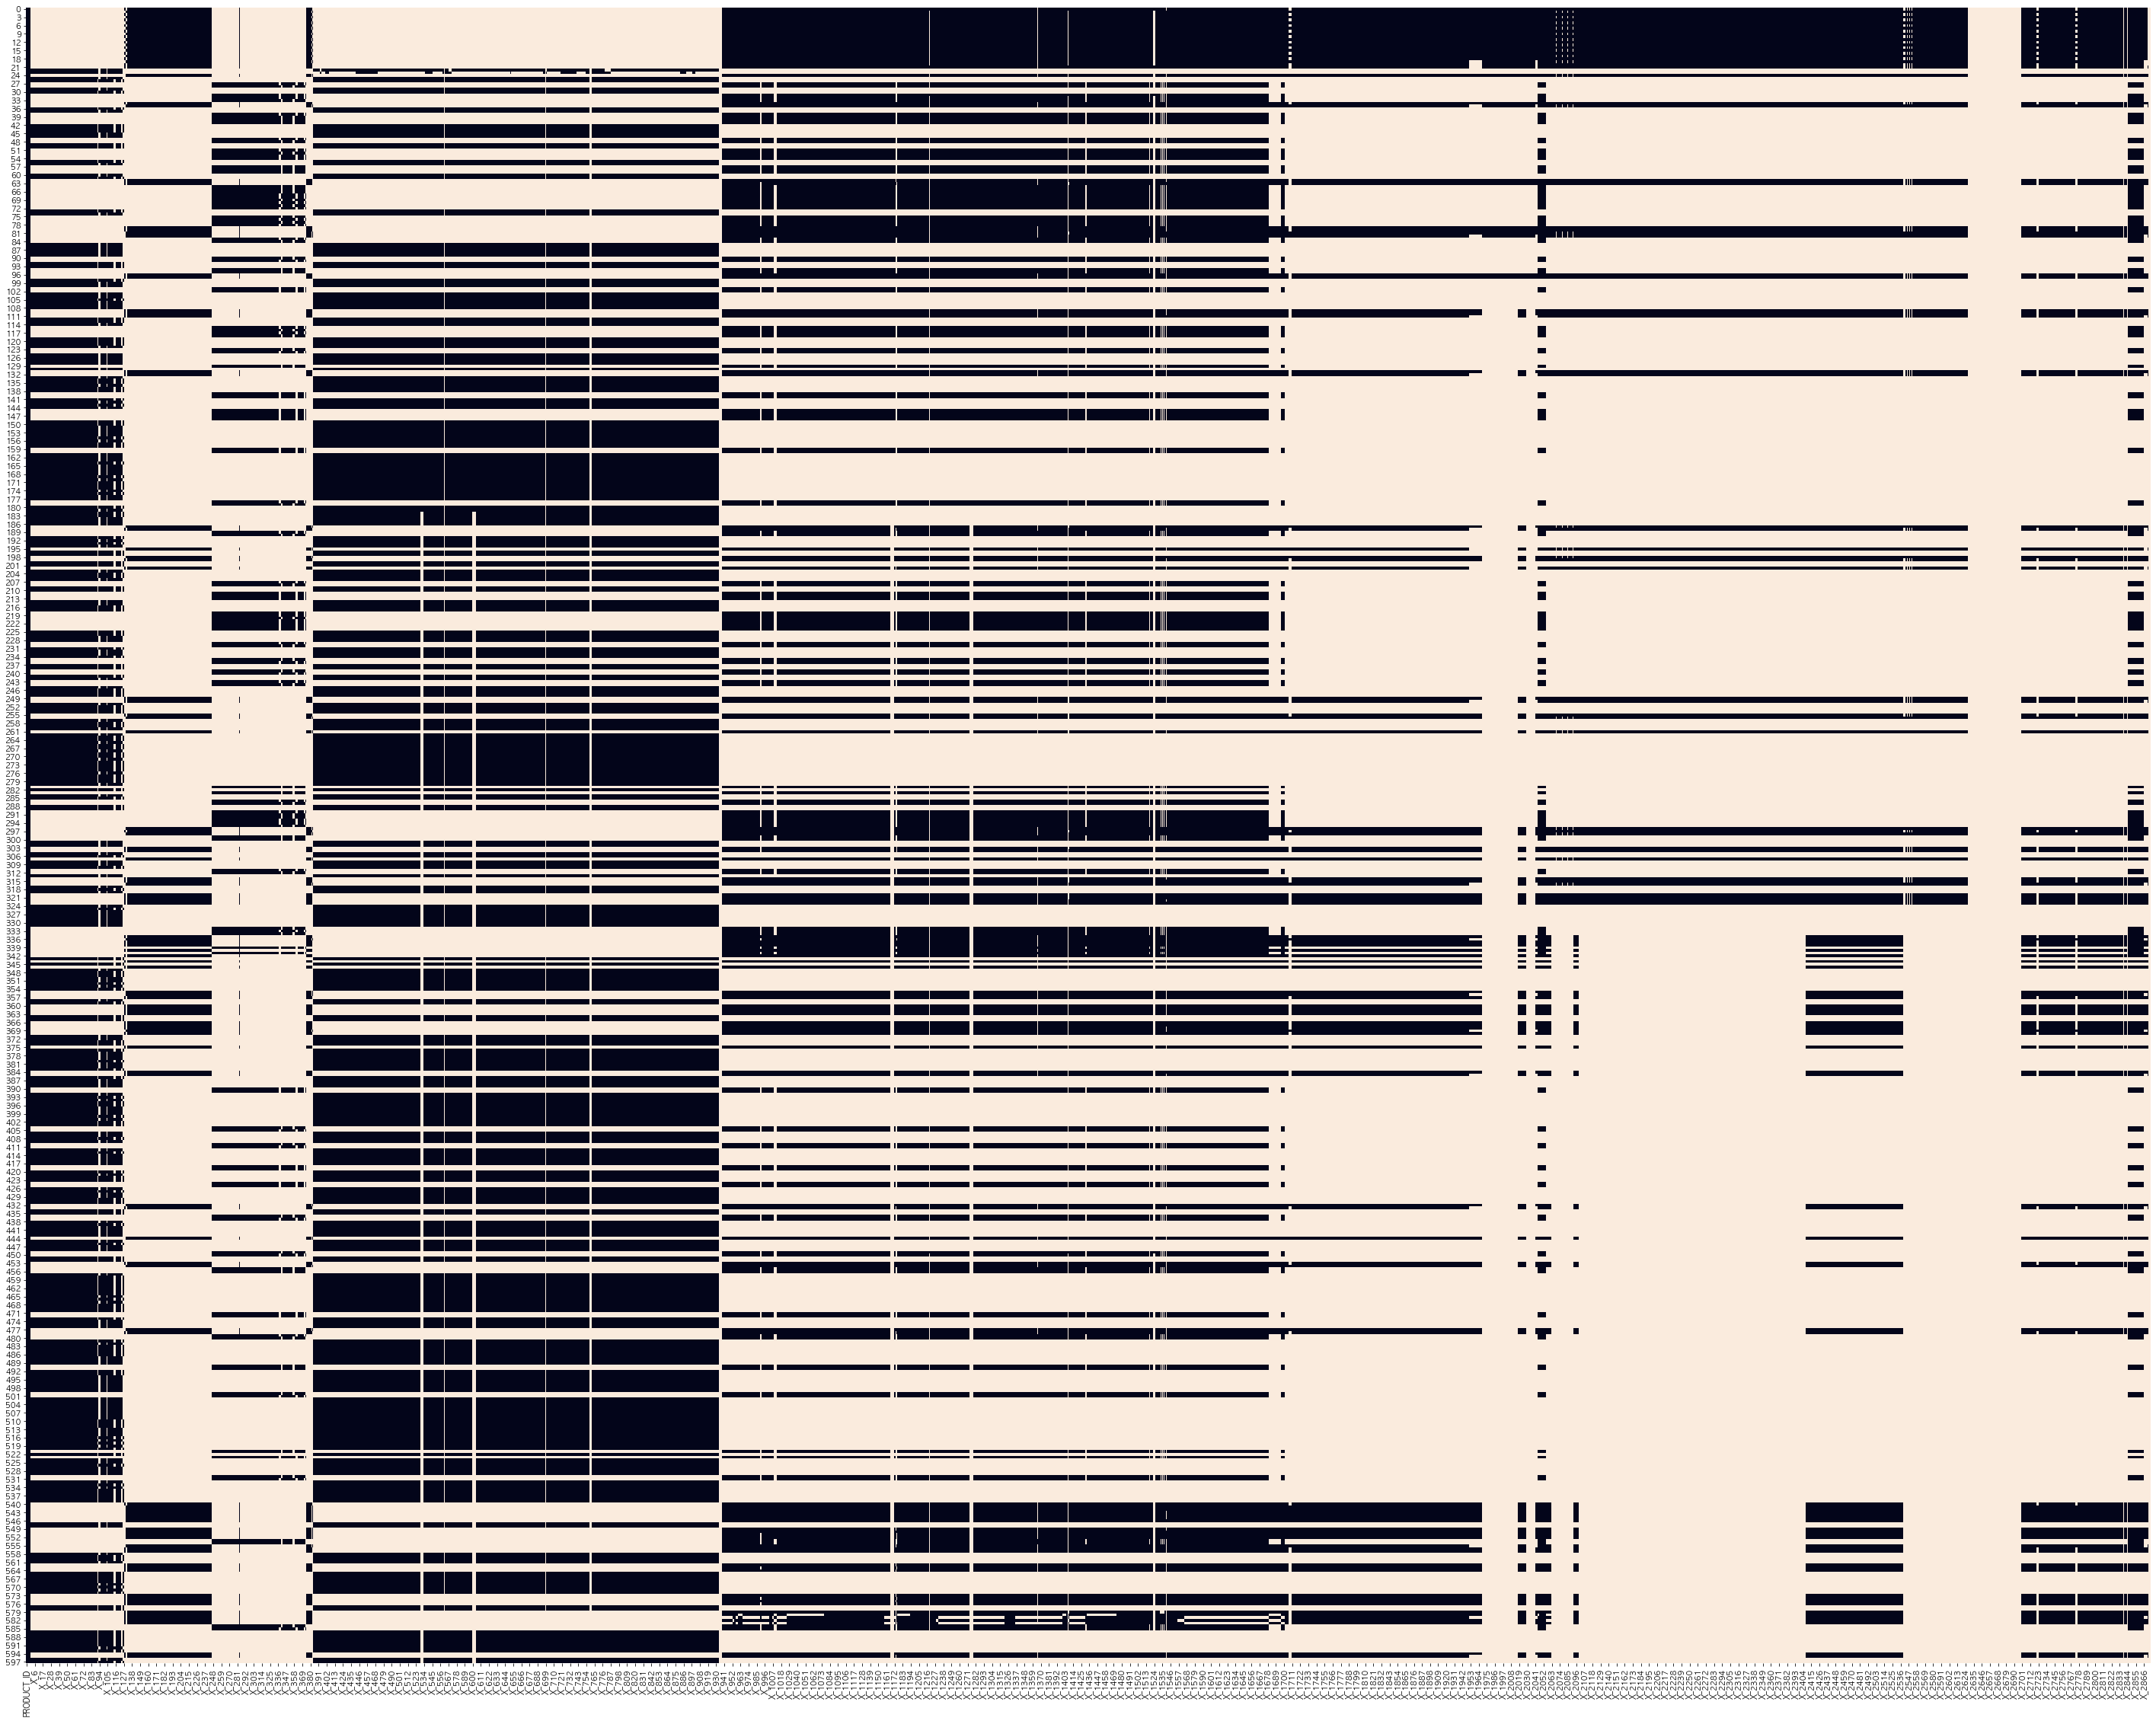

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# 각 셀이 null인지 여부를 나타내는 불리언 데이터프레임 생성
null = train_df.isnull()

# 새로운 figure 생성 및 크기 조절
plt.figure(figsize=(50, 40))

# seaborn을 사용한 히트맵 시각화
sns.heatmap(null, cbar=False)

# 그래프 표시
plt.show()

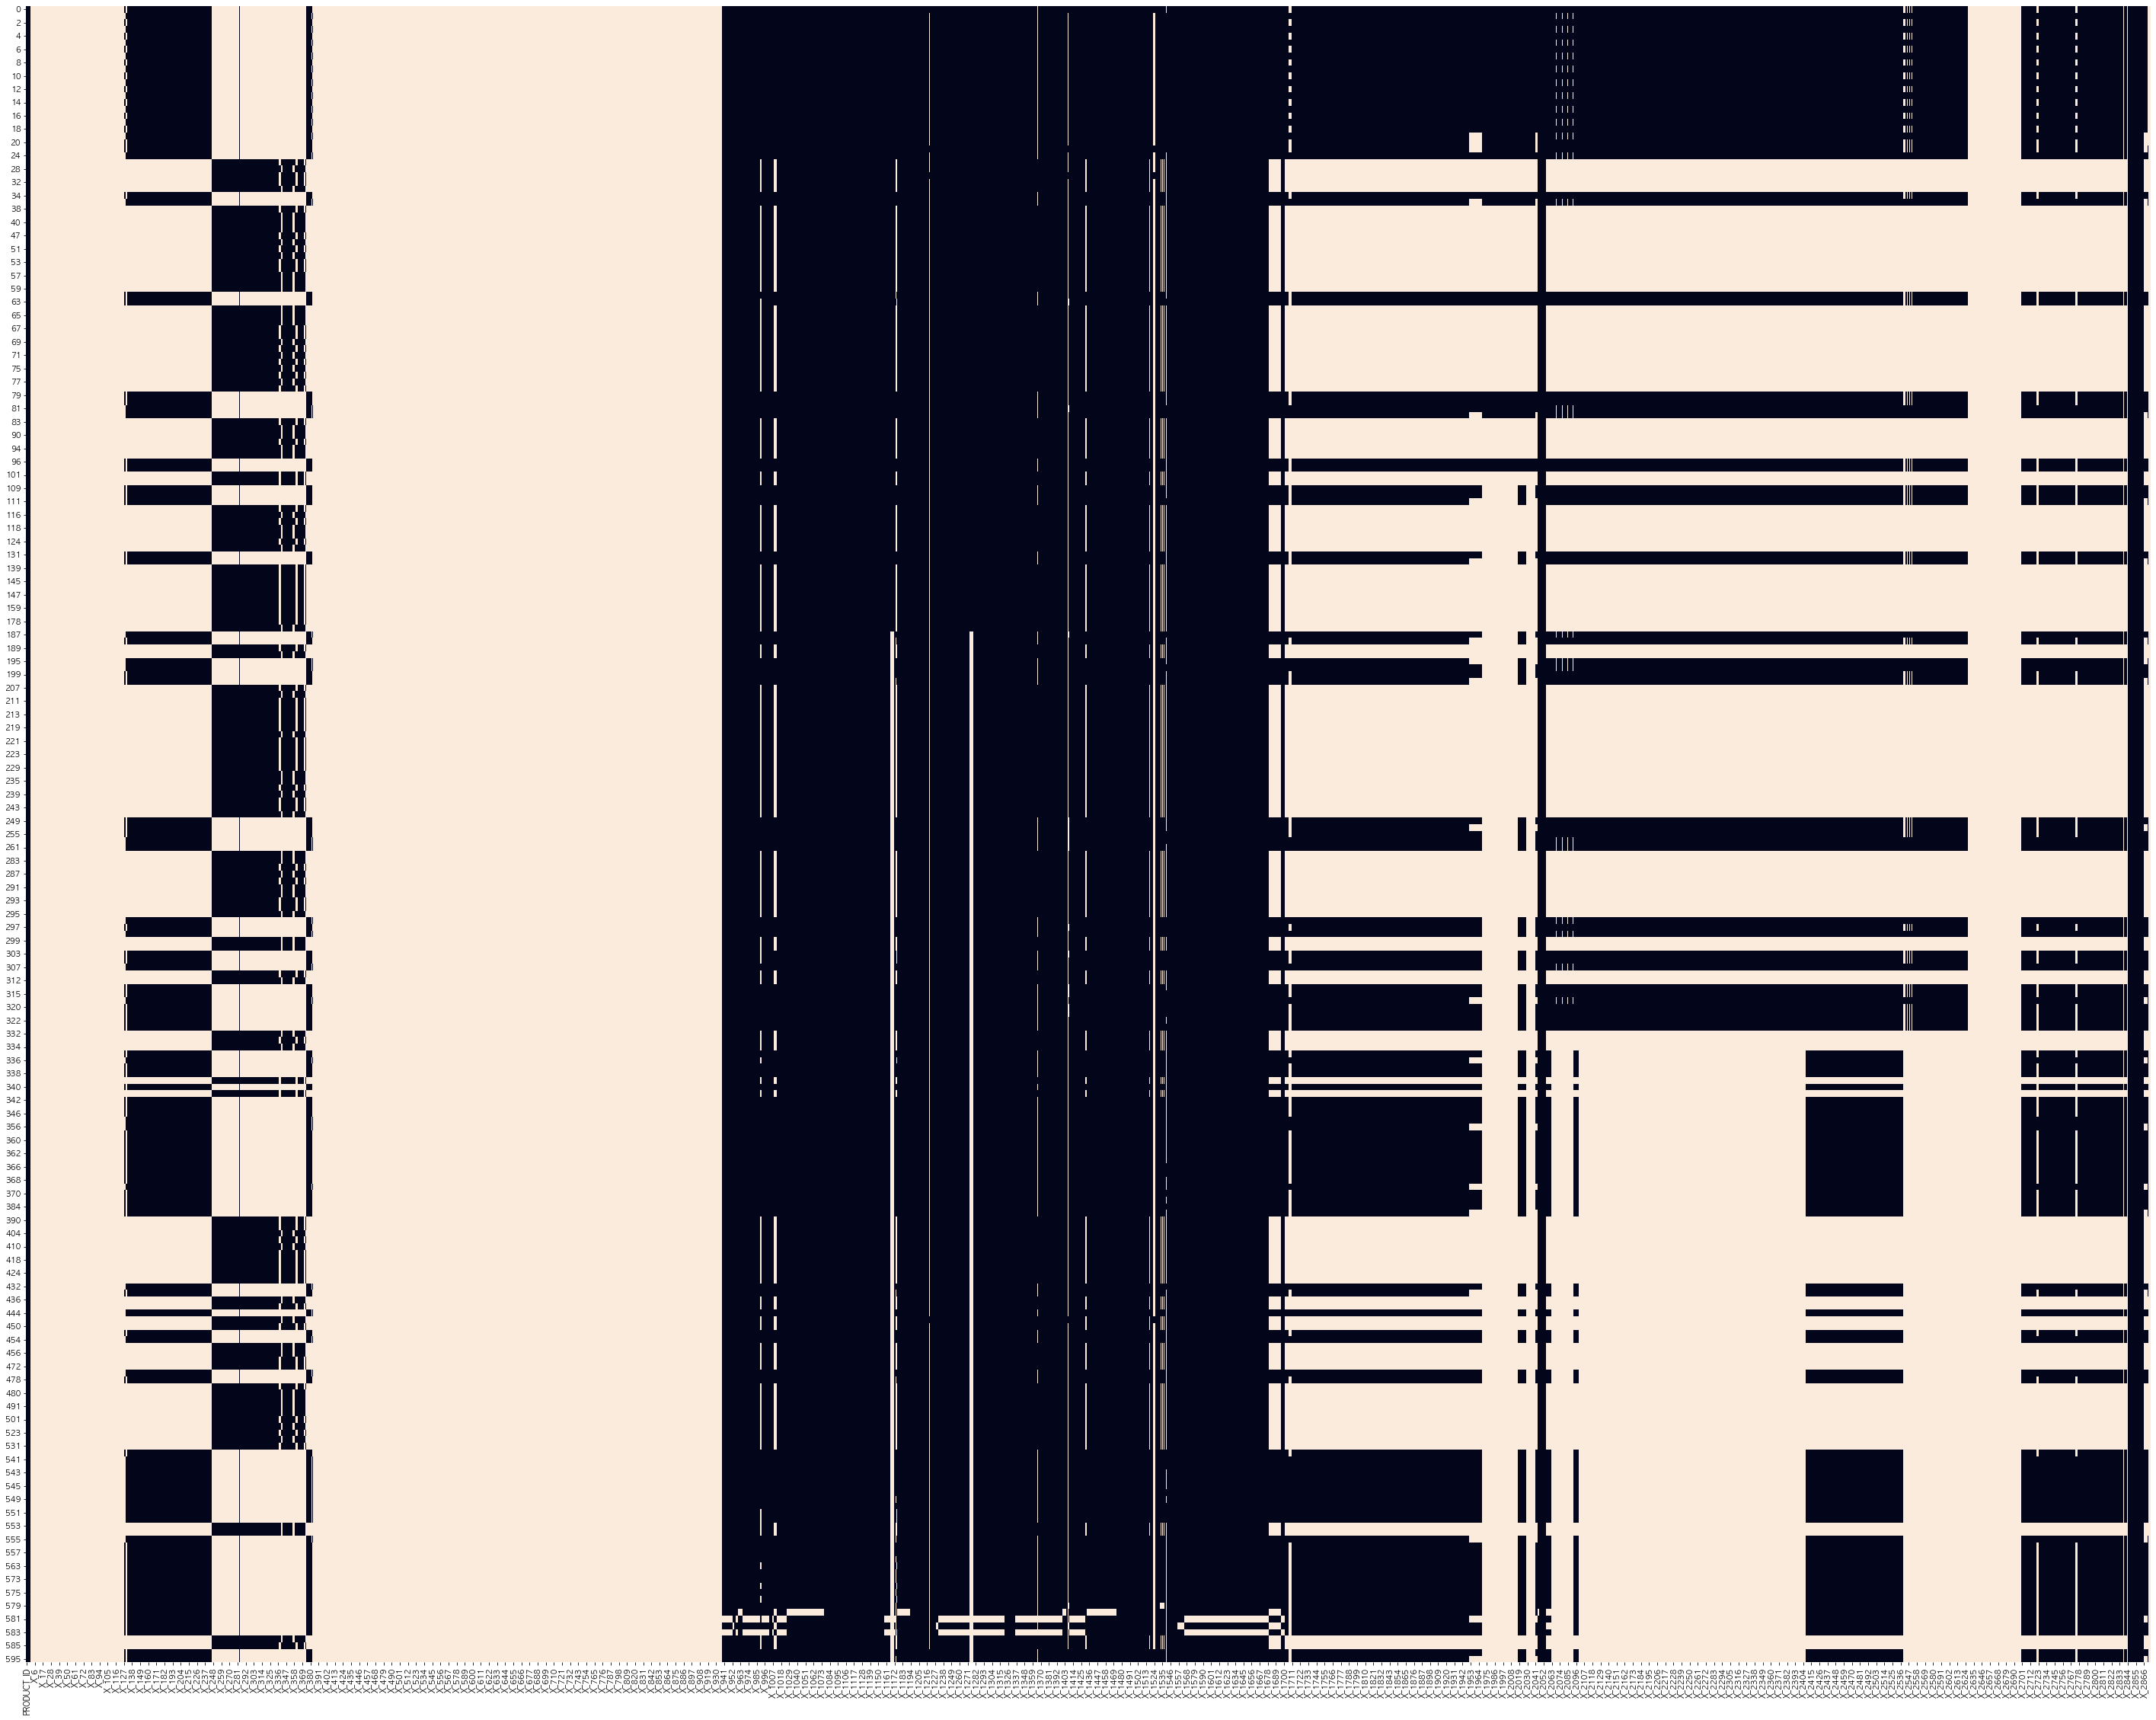

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt

# 각 셀이 null인지 여부를 나타내는 불리언 데이터프레임 생성
null = train_df[train_df.PRODUCT_CODE=='A_31'].isnull()

# 새로운 figure 생성 및 크기 조절
plt.figure(figsize=(50, 40))

# seaborn을 사용한 히트맵 시각화
sns.heatmap(null, cbar=False)

# 그래프 표시
plt.show()

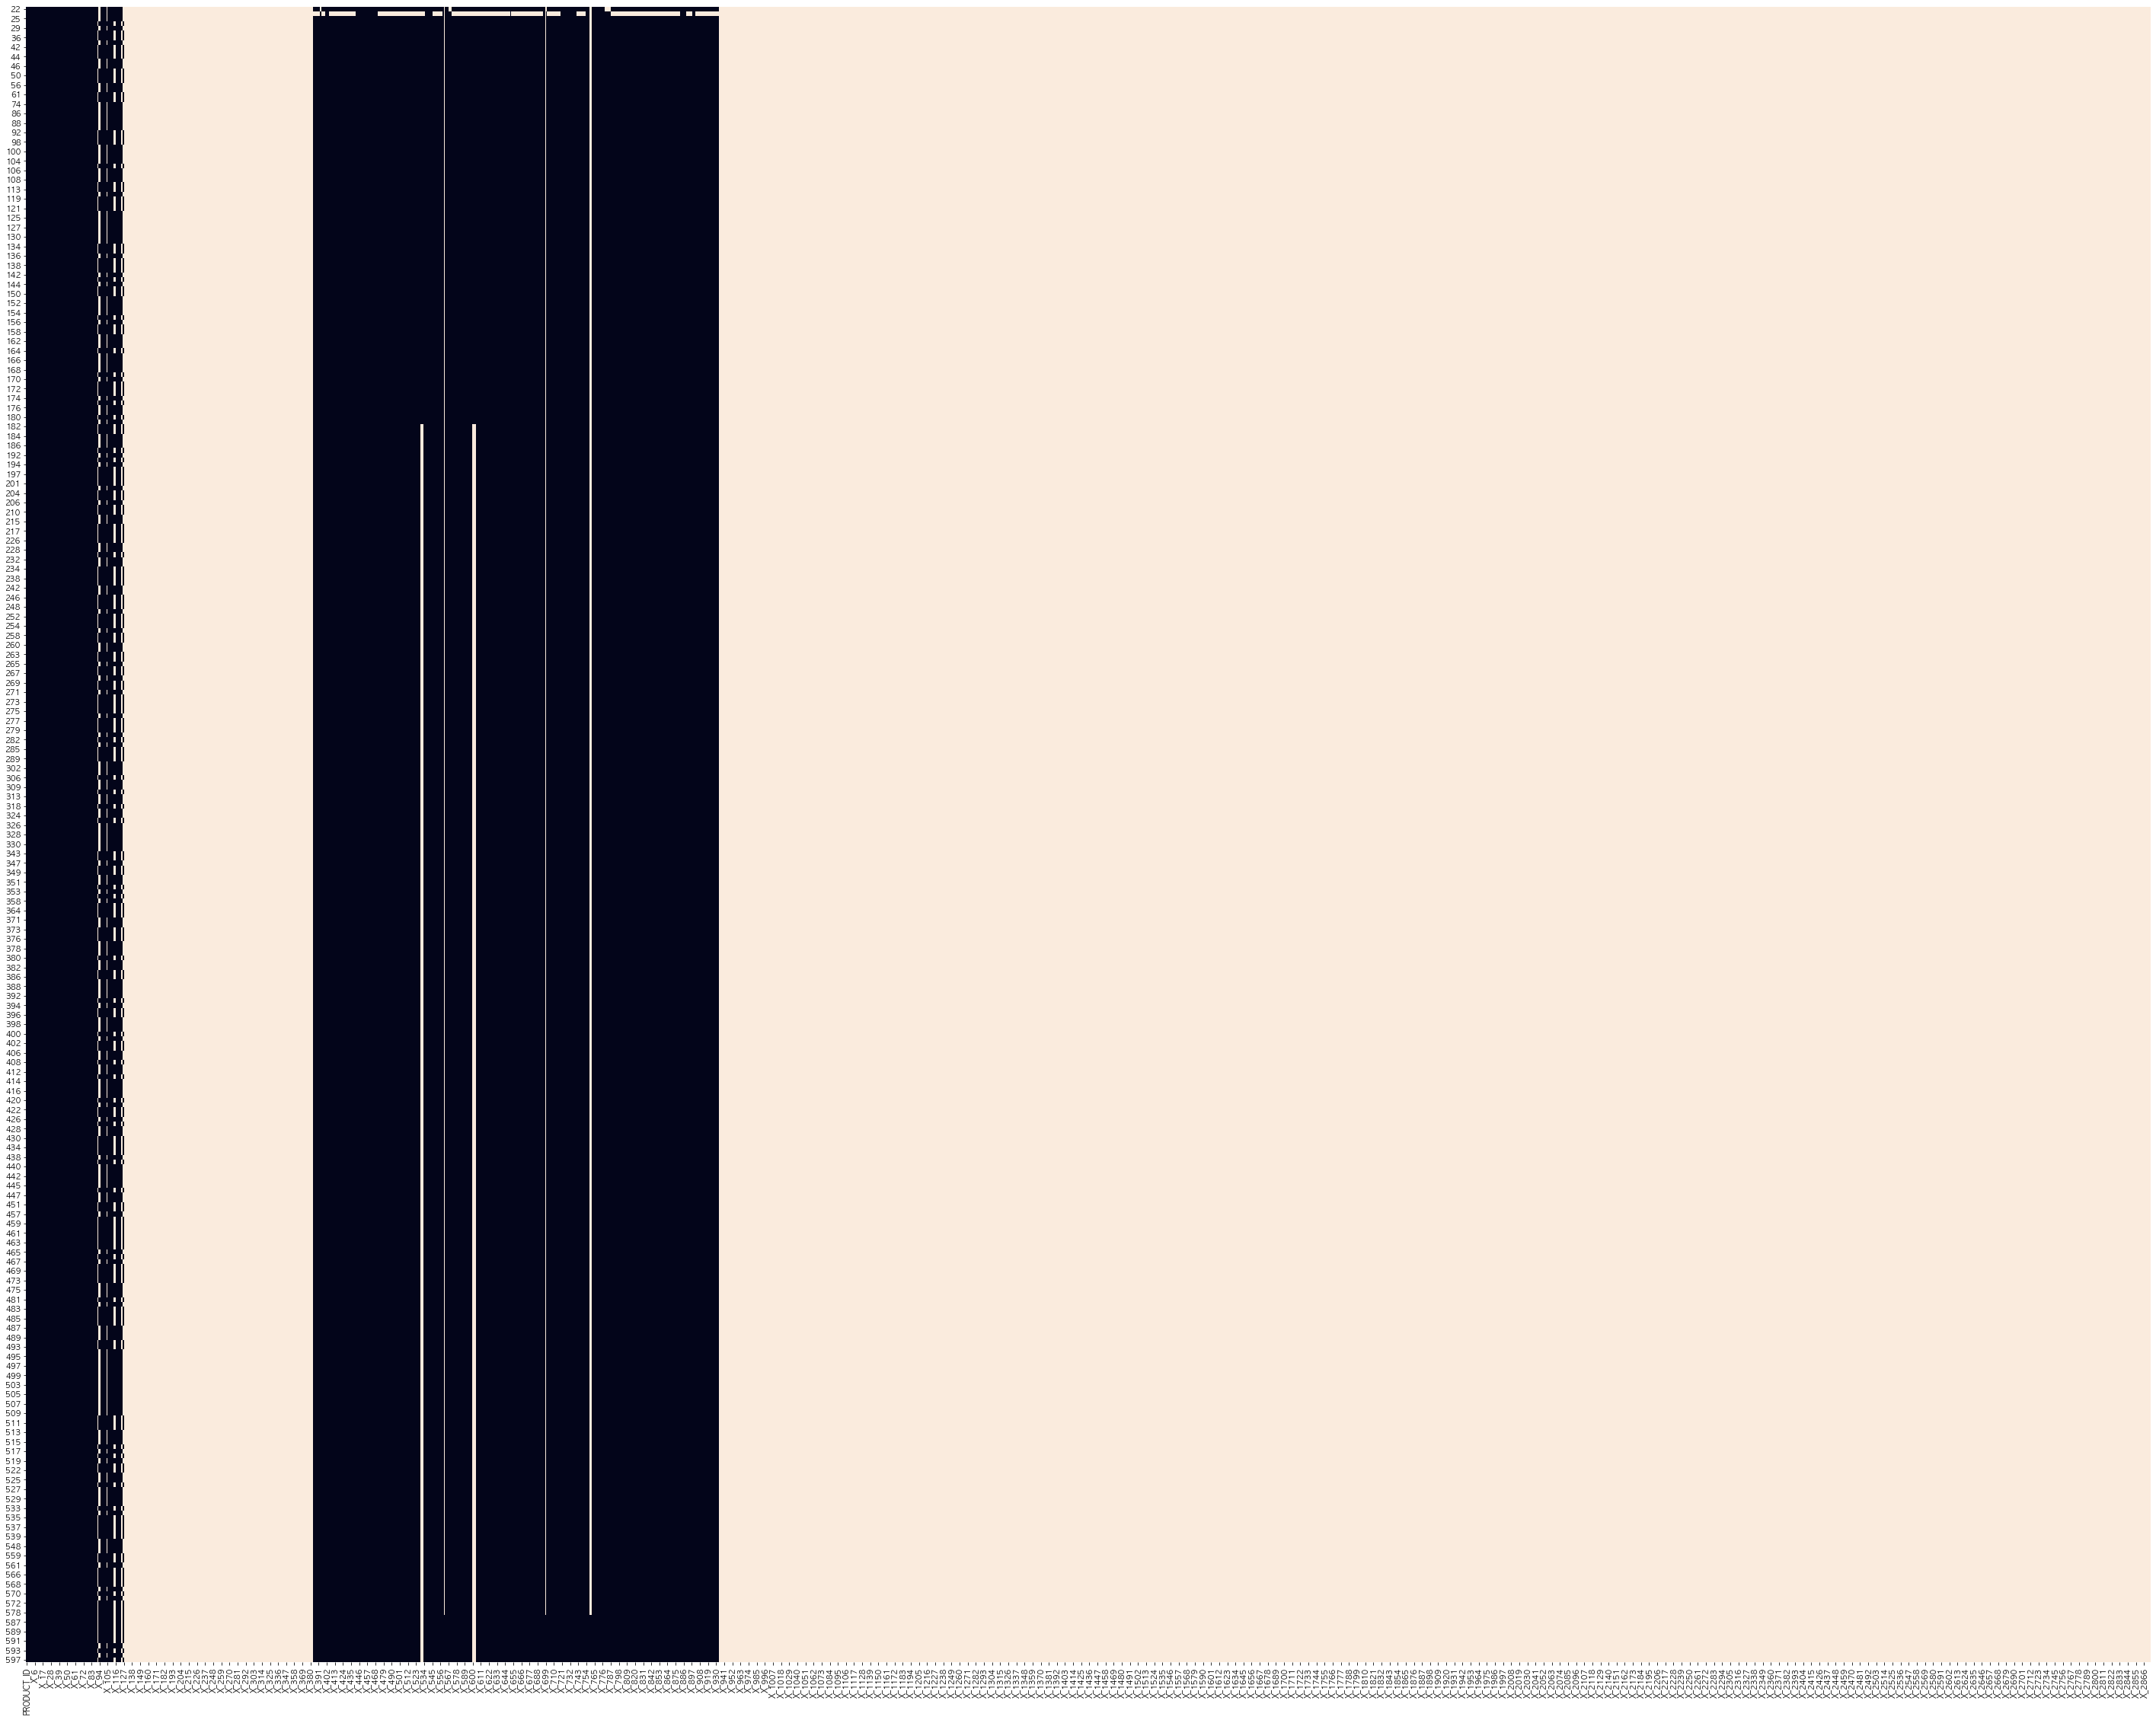

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt

# 각 셀이 null인지 여부를 나타내는 불리언 데이터프레임 생성
null = train_df[(train_df.PRODUCT_CODE=='T_31') | (train_df.PRODUCT_CODE=='O_31')].isnull()

# 새로운 figure 생성 및 크기 조절
plt.figure(figsize=(50, 40))

# seaborn을 사용한 히트맵 시각화
sns.heatmap(null, cbar=False)

# 그래프 표시
plt.show()

<Axes: >

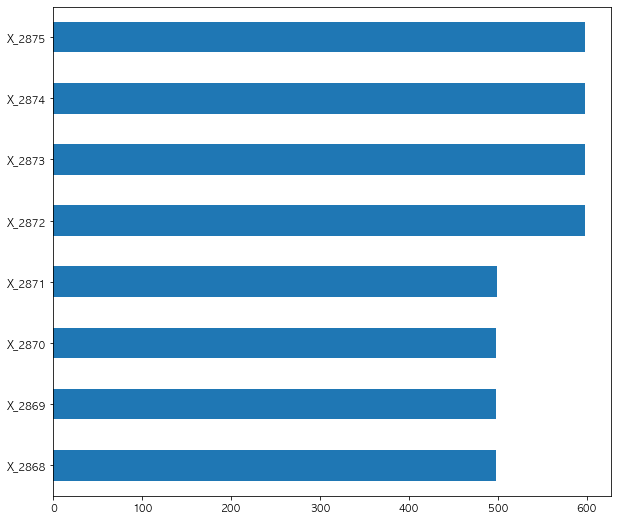

In [227]:
# null값 분포 시각화 마지막 8개의 컬럼
train_df.iloc[:,-8:].isnull().sum().plot.barh(figsize=(10,9))

더 구체적으로 null값의 분포를 파악하기 위해 다른 특징이 보이는 8개부분을 나누어 시각화

In [13]:
train_dfc = train_df.iloc[:, 6:]
product_A = train_dfc[train_df['PRODUCT_CODE']=='A_31'].count()
product_O = train_dfc[train_df['PRODUCT_CODE']=='O_31'].count()
product_T = train_dfc[train_df['PRODUCT_CODE']=='T_31'].count()

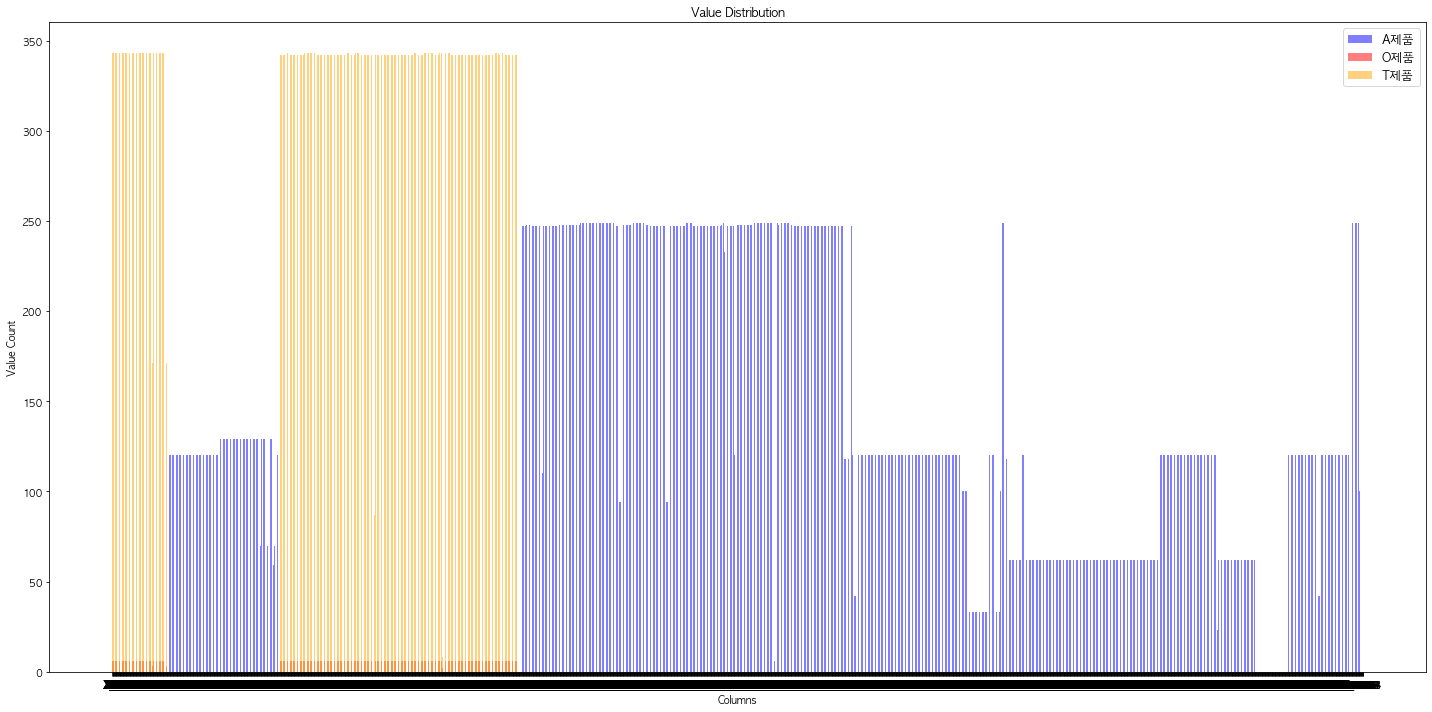

In [27]:
fig, ax = plt.subplots(figsize=(20,10))

x_indexes = np.arange(train_dfc.shape[1]) 

bar_width = 0.5
#ax.set_ylim([100,350])

ax.bar(x_indexes, product_A, width=bar_width, color='blue', alpha=0.5,
       label='A제품')

ax.bar(x_indexes, product_O, width=bar_width, color='red', alpha=0.5,
       label='O제품')

ax.bar(x_indexes, product_T, width=bar_width, color='orange', alpha=0.5,
       label='T제품')

ax.set_xticks(ticks=x_indexes, labels=train_dfc.columns)
ax.set_xlabel("Columns")
ax.set_ylabel("Value Count")
ax.set_title("Value Distribution")

ax.legend(fontsize = 'large')
plt.tight_layout()

결과 분석
- T 제품,O 제품이 기록되는 컬럼은 노란색과 빨간색이 기록된 두 부분.
- 모든 제품이 기록되지 않는 컬럼들이 존재한다 -> 삭제처리

In [144]:
# A제품 값이 있는 컬럼만 추출
a_col = train_dfc.loc[train_df.PRODUCT_CODE == 'A_31'].notnull().any()
a = pd.DataFrame(a_col[a_col == True]).index

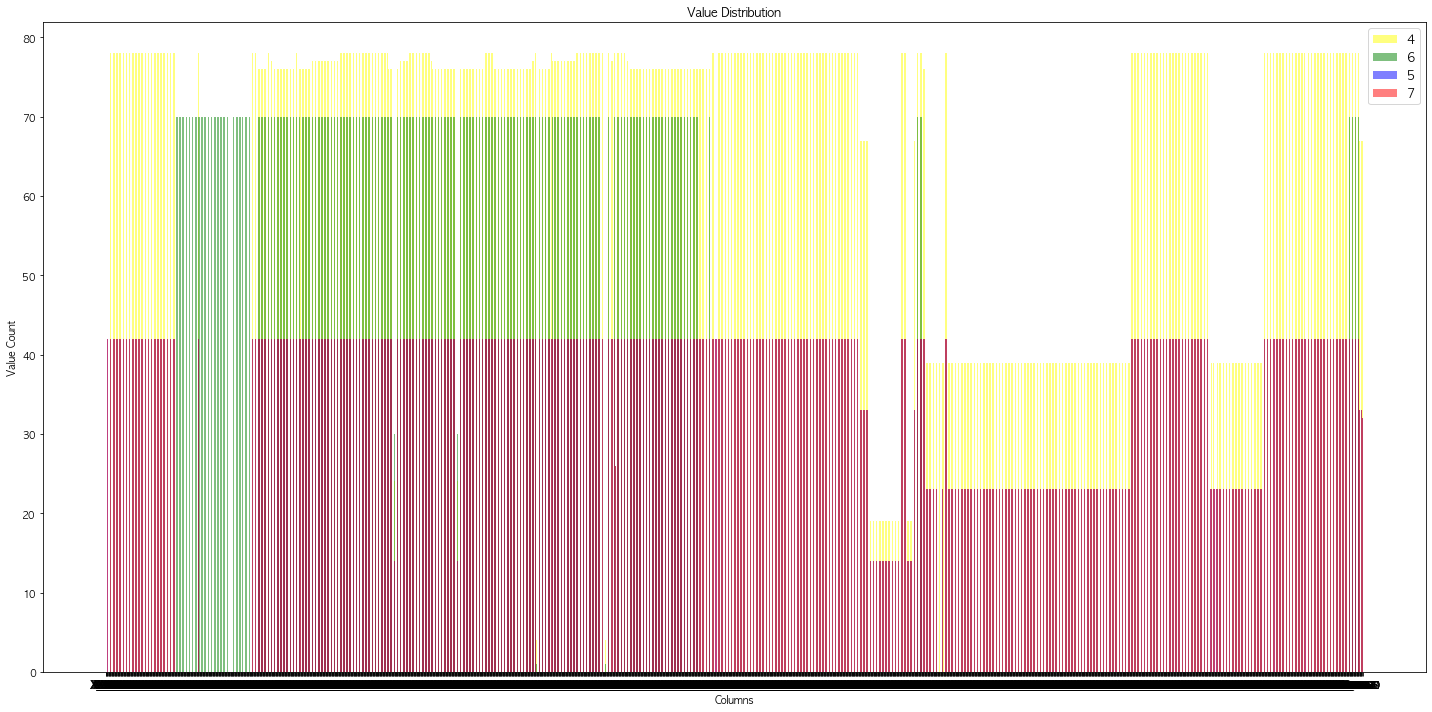

In [87]:
# A 제품만 따로 라인별로 확인
line_4 = train_dfc[train_df.LINE=='T050304'][a].count()
line_7 = train_dfc[train_df.LINE=='T050307'][a].count()
line_6 = train_dfc[train_df.LINE=='T010306'][a].count()
line_5 = train_dfc[train_df.LINE=='T010305'][a].count()

fig, ax = plt.subplots(figsize=(20,10))

x_indexes = np.arange(len(a)) 

bar_width = 0.5
#ax.set_ylim([100,350])

ax.bar(x_indexes, line_4, width=bar_width, color='yellow', alpha=0.5,
       label='4')

ax.bar(x_indexes, line_6, width=bar_width, color='green', alpha=0.5,
       label='6')

ax.bar(x_indexes, line_7, width=bar_width, color='blue', alpha=0.5,
       label='5')

ax.bar(x_indexes, line_7, width=bar_width, color='red', alpha=0.5,
       label='7')

ax.set_xticks(ticks=x_indexes, labels=a)
ax.set_xlabel("Columns")
ax.set_ylabel("Value Count")
ax.set_title("Value Distribution")

ax.legend(fontsize = 'large')
plt.tight_layout()

같은 A 제품을 기록하더라도 다 기록되고 있지 않음. 결측치를 어떻게 처리해줄지 고민해야함.

In [14]:
# T제품 값이 있는 컬럼만 추출
t_col = train_dfc.loc[train_df.PRODUCT_CODE == 'T_31'].notnull().any()
t = pd.DataFrame(t_col[t_col == True]).index

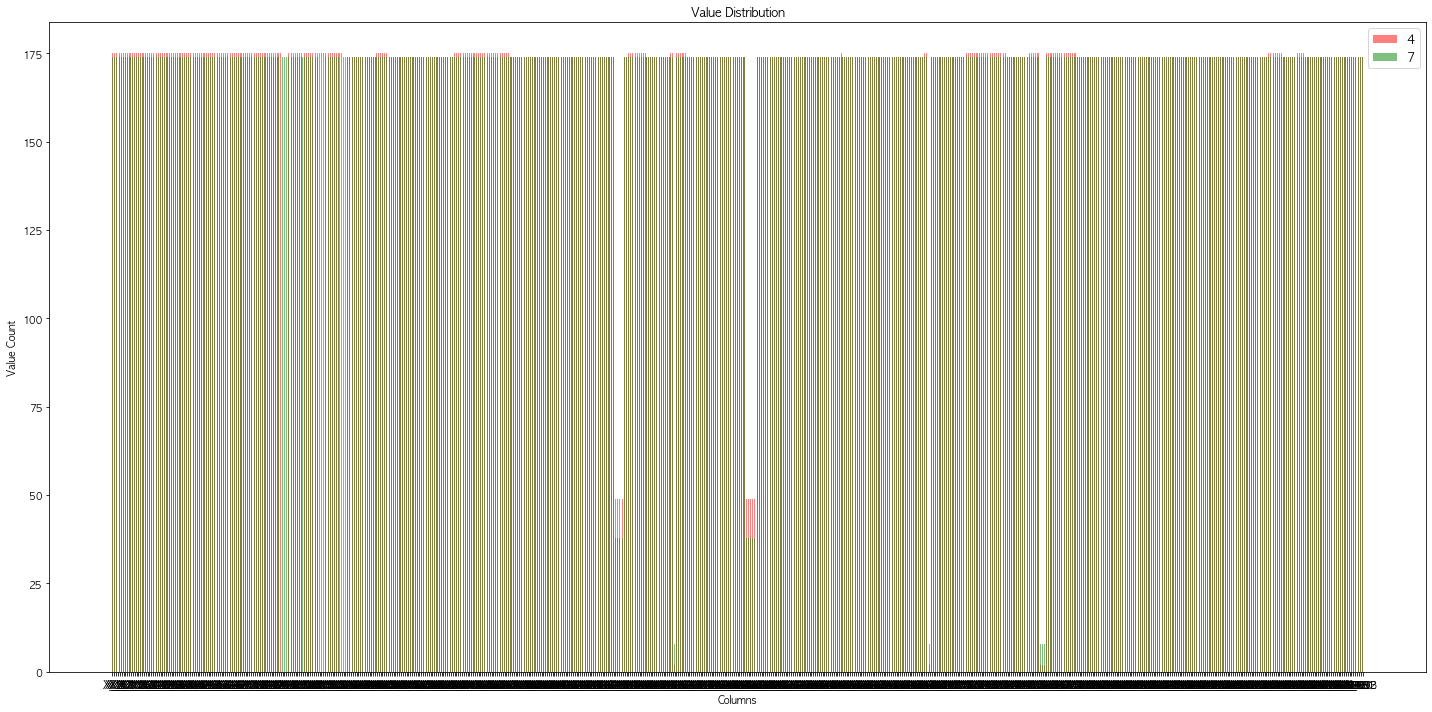

In [17]:
# T 제품만 따로 라인별로 확인
line_304 = train_dfc[train_df.LINE=='T100304'][t].count()
line_306 = train_dfc[train_df.LINE=='T100306'][t].count()

fig, ax = plt.subplots(figsize=(20,10))

x_indexes = np.arange(len(t)) 

bar_width = 0.5
#ax.set_ylim([100,350])

ax.bar(x_indexes, line_304, width=bar_width, color='red', alpha=0.5,
       label='4')

ax.bar(x_indexes, line_306, width=bar_width, color='green',  alpha=0.5,
       label='7')


ax.set_xticks(ticks=x_indexes, labels=t)
ax.set_xlabel("Columns")
ax.set_ylabel("Value Count")
ax.set_title("Value Distribution")

ax.legend(fontsize = 'large')
plt.tight_layout()

T 제품만 보더라도 몇몇 T100304에만 기록된 것을 볼 수 있습니다.-> 결측치 처리 고민

## 이상치 여부 확인하기

In [29]:
df_num = train_df.iloc[:,6:]
df_num.describe()

X_1         X_2    X_3    X_4         X_5    X_6         X_7  \
count  349.000000  349.000000  349.0  349.0  349.000000  349.0  349.000000   
mean     2.409742   95.123209    0.0   45.0   10.392550    0.0   48.802292   
std      5.895256    4.107640    0.0    0.0    0.489019    0.0    4.373824   
min      1.000000   87.000000    0.0   45.0   10.000000    0.0   45.000000   
25%      2.000000   93.000000    0.0   45.0   10.000000    0.0   45.000000   
50%      2.000000   95.000000    0.0   45.0   10.000000    0.0   45.000000   
75%      2.000000   98.000000    0.0   45.0   11.000000    0.0   51.000000   
max    103.000000  102.000000    0.0   45.0   11.000000    0.0   62.000000   

              X_8         X_9   X_10  ...      X_2866     X_2867      X_2868  \
count  349.000000  349.000000  349.0  ...  100.000000  100.00000  100.000000   
mean    10.048711   41.469914    2.0  ...   50.807300   53.60770   49.606200   
std      0.215571   10.515032    0.0  ...    7.011828    8.13899    7.158917   
min     10.000000   31.000000    2.0  ...   32.120000   31.70000   32.560000   
25%     10.000000   31.000000    2.0  ...   49.485000   52.20000   42.160000   
50%     10.000000   31.000000    2.0  ...   53.425000   55.92500   51.460000   
75%     10.000000   52.000000    2.0  ...   55.287500   58.97500   55.030000   
max     11.000000   52.000000    2.0  ...   60.240000   68.66000   60.410000   

           X_2869     X_2870  X_2871  X_2872  X_2873  X_2874  X_2875  
count  100.000000  100.00000    99.0     0.0     0.0     0.0     0.0  
mean    51.659800   66.64970     1.0     NaN     NaN     NaN     NaN  
std      8.913065    4.52781     0.0     NaN     NaN     NaN     NaN  
min     30.490000   61.67000     1.0     NaN     NaN     NaN     NaN  
25%     49.915000   63.64500     1.0     NaN     NaN     NaN     NaN  
50%     56.175000   65.14000     1.0     NaN     NaN     NaN     NaN  
75%     57.175000   67.11500     1.0     NaN     NaN     NaN     NaN  
max     59.930000   79.75000     1.0     NaN     NaN     NaN     NaN  

[8 rows x 2875 columns]

In [49]:
import pandas as pd

summary_statistics = df_num.describe()

mean = summary_statistics.loc['mean']
std = summary_statistics.loc['std']

lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

outliers = (df_num < lower_bound) | (df_num > upper_bound)

outlier_columns = outliers.any()

print("이상치가 있는 컬럼:")
print(outlier_columns[outlier_columns].index)


이상치가 있는 컬럼:
Index(['X_1', 'X_7', 'X_8', 'X_11', 'X_12', 'X_13', 'X_15', 'X_16', 'X_17',
       'X_20',
       ...
       'X_2837', 'X_2839', 'X_2841', 'X_2842', 'X_2843', 'X_2851', 'X_2852',
       'X_2860', 'X_2861', 'X_2862'],
      dtype='object', length=829)


In [45]:
# import pandas as pd
# from scipy.stats import skew, kurtosis
# count1 = 0
# count2 = 0
# count3 = 0

# # 변이계수 계산
# coef_of_variation = df_num.std() / df_num.mean()
# for i, val in enumerate(coef_of_variation):
#     if val >= 30:
#         print("높은 변동성", i, val)
#         count1 += 1

# # 왜도 계산
# for i, val in enumerate(df_num.skew()):
#     if abs(val) >= 2:
#         print("비정규분포 왜도", i, val)
#         count2 += 1

# # 첨도 계산
# for i, val in enumerate(df_num.kurt()):
#     if abs(val) >= 2:
#         print("비정규분포 첨도", i, val)
#         count3 += 1

비정규분포 왜도 0 15.200713314339119
비정규분포 왜도 7 4.211045286184273
비정규분포 왜도 14 18.681541692269402
비정규분포 왜도 23 2.1496147857270964
비정규분포 왜도 38 -7.460708576849816
비정규분포 왜도 93 2.349025856511688
비정규분포 왜도 94 -4.373481343448458
비정규분포 왜도 112 3.84890570543383
비정규분포 왜도 114 13.2287565553228
비정규분포 왜도 142 10.954451150103319
비정규분포 왜도 145 -2.1797956291995657
비정규분포 왜도 171 2.184681381889644
비정규분포 왜도 172 2.41075670220011
비정규분포 왜도 176 2.184681381889644
비정규분포 왜도 179 2.1846813818871045
비정규분포 왜도 184 -3.268131508412323
비정규분포 왜도 232 4.645589797340586
비정규분포 왜도 236 2.529150450693528
비정규분포 왜도 245 7.375388218927408
비정규분포 왜도 271 -3.4174897451889006
비정규분포 왜도 275 -6.4011105915753275
비정규분포 왜도 278 2.6836920085915668
비정규분포 왜도 279 -11.357816691600611
비정규분포 왜도 280 2.6836920085915668
비정규분포 왜도 340 -5.78414450029081
비정규분포 왜도 347 2.5115262608880062
비정규분포 왜도 359 -7.6811457478686185
비정규분포 왜도 360 2.184758918948689
비정규분포 왜도 379 2.0594626084373866
비정규분포 왜도 392 2.594431188848622
비정규분포 왜도 394 -2.343606742374638
비정규분포 왜도 395 -5.657065471146

비정규분포 첨도 2714 2.547634556113998
비정규분포 첨도 2715 2.2660165655673623
비정규분포 첨도 2723 80.091731299441
비정규분포 첨도 2724 14.6169377573595
비정규분포 첨도 2725 2.4843090823653187
비정규분포 첨도 2736 119.99999999999997
비정규분포 첨도 2739 7.106812526434949
비정규분포 첨도 2751 -2.023732371636404
비정규분포 첨도 2752 5.536994938351697
비정규분포 첨도 2755 8.603904521811977
비정규분포 첨도 2757 36.58179089726316
비정규분포 첨도 2759 4.176916836943063
비정규분포 첨도 2764 2.2337922819650773
비정규분포 첨도 2765 -2.0155638852671487
비정규분포 첨도 2767 4.9732558135021545
비정규분포 첨도 2768 -2.0237323716356905
비정규분포 첨도 2772 42.0
비정규분포 첨도 2773 42.00000000000003
비정규분포 첨도 2775 57.43177247917637
비정규분포 첨도 2776 35.5191388983585
비정규분포 첨도 2777 35.32809145492165
비정규분포 첨도 2795 9.395838563607583
비정규분포 첨도 2796 5.960030130198502
비정규분포 첨도 2797 7.970480102408629
비정규분포 첨도 2799 2.4433769328408763
비정규분포 첨도 2802 2.4742091651388547
비정규분포 첨도 2803 2.4742091651388547
비정규분포 첨도 2829 4.563515632609123
비정규분포 첨도 2830 4.563515632609123
비정규분포 첨도 2838 3.867144886249644
비정규분포 첨도 2841 8.585045345964625
비정규분포 첨도 284

In [46]:
# print(count1, count2, count3)

0 257 548


0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 2
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 2
0 | 2
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 2
0 | 2
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 2
0 | 2
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 2
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 2
0 | 2
0 | 2
0 | 2
0 | 1
0 | 2
0 | 1
0 | 2
0 | 2
0 | 

/var/folders/rc/3jzqjhp56_v2qxb49fkb1x880000gn/T/ipykernel_66760/2209195775.py:14: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(data, use_line_collection=True)


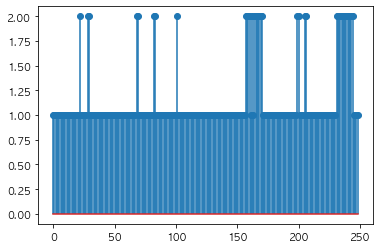

In [225]:
# 루프와 잎 노드로 이변량 분석
import matplotlib.pyplot as plt

def stem_plot(data):
    stems = [int(x / 10) for x in data]
    leaf = [int(x % 10) for x in data]

    # 각 줄에 대한 데이터 출력
    for s, l in zip(stems, leaf):
        line = f"{s} | {l}"
        print(line)

    # 플롯 생성
    plt.stem(data, use_line_collection=True)
    plt.show()


# 루트와 잎 플롯 생성 및 출력
stem_plot(train_a['X_284'])

In [224]:
for i in train_a.iloc[:,7:].columns:
    if train_a[i].isnull().sum() == 0:
        print(i)

X_284
X_955
X_956
X_1002
X_1003
X_1077
X_1078
X_1079
X_1080
X_1081
X_1082
X_1083
X_1084
X_1085
X_1086
X_1087
X_1088
X_1089
X_1090
X_1091
X_1092
X_1093
X_1094
X_1095
X_1096
X_1097
X_1098
X_1099
X_1100
X_1101
X_1102
X_1103
X_1104
X_1105
X_1106
X_1107
X_1108
X_1109
X_1110
X_1111
X_1112
X_1113
X_1114
X_1115
X_1116
X_1117
X_1118
X_1119
X_1120
X_1121
X_1122
X_1123
X_1124
X_1125
X_1126
X_1127
X_1128
X_1129
X_1130
X_1131
X_1132
X_1133
X_1134
X_1135
X_1136
X_1137
X_1138
X_1139
X_1140
X_1141
X_1142
X_1143
X_1144
X_1145
X_1146
X_1147
X_1148
X_1149
X_1150
X_1151
X_1152
X_1153
X_1154
X_1155
X_1156
X_1157
X_1193
X_1194
X_1195
X_1196
X_1197
X_1198
X_1199
X_1200
X_1201
X_1202
X_1203
X_1204
X_1205
X_1206
X_1207
X_1208
X_1209
X_1210
X_1211
X_1212
X_1213
X_1214
X_1215
X_1216
X_1217
X_1218
X_1220
X_1221
X_1222
X_1223
X_1224
X_1225
X_1226
X_1227
X_1321
X_1322
X_1323
X_1324
X_1325
X_1326
X_1327
X_1328
X_1329
X_1330
X_1331
X_1332
X_1333
X_1334
X_1335
X_1405
X_1406
X_1473
X_1474
X_1475
X_1476
X_1477
X_1478
X_

In [212]:
train_a.head()

PRODUCT_ID  Y_Class  Y_Quality        TIMESTAMP     LINE PRODUCT_CODE  \
0  TRAIN_000        1   0.533433  2022-06-13 5:14  T050304         A_31   
1  TRAIN_001        2   0.541819  2022-06-13 5:22  T050307         A_31   
2  TRAIN_002        1   0.531267  2022-06-13 5:30  T050304         A_31   
3  TRAIN_003        2   0.537325  2022-06-13 5:39  T050307         A_31   
4  TRAIN_004        1   0.531590  2022-06-13 5:47  T050304         A_31   

    X_128   X_129    X_130  X_132  ...  X_2862  X_2863      X_2864  X_2865  \
0  7813.0  7813.0      NaN   0.19  ...   189.0   383.0  368.296296   353.0   
1     NaN     NaN  19854.0   0.20  ...   185.6   383.0  367.735849   353.0   
2  7815.0  7815.0      NaN   0.19  ...   165.5   383.0  367.320755   353.0   
3     NaN     NaN  19856.0   0.20  ...   165.8   384.0  369.188679   353.0   
4  7817.0  7817.0      NaN   0.19  ...   182.6   383.0  367.351852   352.0   

   X_2866  X_2867  X_2868  X_2869  X_2870  X_2871  
0   39.34   40.89   32.56   34.09   77.77     NaN  
1   38.89   42.82   43.92   35.34   72.55     NaN  
2   39.19   36.65   42.47   36.53   78.35     NaN  
3   37.74   39.17   52.17   30.58   71.78     NaN  
4   38.70   41.89   46.93   33.09   76.97     NaN  

[5 rows x 1741 columns]

## 결측치 처리

#### 현재 컬럼수가 너무 많기 때문에 상관관계 분석을 통해 제거할 컬럼을 찾고자 함. 
#### 상관관계분석을 위해 결측치를 처리해주어야함.

**k-nn Imputation으로 진행**

In [180]:
train_a = pd.read_csv('./data/train_a.csv')

In [181]:
df = train_a.iloc[:,6:]
df

X_128    X_129    X_130  X_132  X_133  X_134  X_135  X_136  X_137  \
0     7813.0   7813.0      NaN   0.19   0.20   0.19    0.2  228.0  228.0   
1        NaN      NaN  19854.0   0.20   0.21   0.20    0.2  413.0  414.0   
2     7815.0   7815.0      NaN   0.19   0.20   0.19    0.2  228.0  228.0   
3        NaN      NaN  19856.0   0.20   0.21   0.20    0.2  414.0  414.0   
4     7817.0   7817.0      NaN   0.19   0.20   0.18    0.2  228.0  228.0   
..       ...      ...      ...    ...    ...    ...    ...    ...    ...   
244  11920.0  11920.0      NaN   0.19   0.20   0.19    0.2  230.0  230.0   
245      NaN      NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
246      NaN      NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
247  14810.0  14810.0      NaN   0.19   0.20   0.19    0.2  304.0  304.0   
248  14813.0  14813.0      NaN   0.19   0.20   0.19    0.2  304.0  304.0   

     X_138  ...  X_2862  X_2863      X_2864  X_2865  X_2866  X_2867  X_2868  \
0    225.0  ...   189.0   383.0  368.296296   353.0   39.34   40.89   32.56   
1    414.0  ...   185.6   383.0  367.735849   353.0   38.89   42.82   43.92   
2    225.0  ...   165.5   383.0  367.320755   353.0   39.19   36.65   42.47   
3    414.0  ...   165.8   384.0  369.188679   353.0   37.74   39.17   52.17   
4    225.0  ...   182.6   383.0  367.351852   352.0   38.70   41.89   46.93   
..     ...  ...     ...     ...         ...     ...     ...     ...     ...   
244  230.0  ...   181.6   394.0  371.943396   353.0   51.71   59.64   54.61   
245    NaN  ...   184.9   466.0  448.634615   432.0     NaN     NaN     NaN   
246    NaN  ...   176.7   472.0  450.339623   432.0     NaN     NaN     NaN   
247  304.0  ...   168.7   384.0  369.811321   353.0   49.47   53.07   50.89   
248  304.0  ...   156.6   383.0  367.018868   352.0     NaN     NaN     NaN   

     X_2869  X_2870  X_2871  
0     34.09   77.77     NaN  
1     35.34   72.55     NaN  
2     36.53   78.35     NaN  
3     30.58   71.78     NaN  
4     33.09   76.97     NaN  
..      ...     ...     ...  
244   57.05   63.18     1.0  
245     NaN     NaN     NaN  
246     NaN     NaN     NaN  
247   55.10   66.49     1.0  
248     NaN     NaN     1.0  

[249 rows x 1735 columns]

In [182]:
df = train_a.iloc[:,6:]
df.columns

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 5)
imputed_a=imputer.fit_transform(df) 

# 변환 후 데이터 확인
imputed_a = pd.DataFrame(imputed_a)
imputed_a.columns = df.columns

In [183]:
imputed_a.columns = df.columns
imputed_a

X_128    X_129    X_130  X_132  X_133  X_134  X_135  X_136  X_137  \
0     7813.0   7813.0  13151.4   0.19  0.200   0.19    0.2  228.0  228.0   
1     8541.0   8541.0  19854.0   0.20  0.210   0.20    0.2  413.0  414.0   
2     7815.0   7815.0  11472.0   0.19  0.200   0.19    0.2  228.0  228.0   
3     8541.0   8541.0  19856.0   0.20  0.210   0.20    0.2  414.0  414.0   
4     7817.0   7817.0  11569.0   0.19  0.200   0.18    0.2  228.0  228.0   
..       ...      ...      ...    ...    ...    ...    ...    ...    ...   
244  11920.0  11920.0   2024.8   0.19  0.200   0.19    0.2  230.0  230.0   
245  12586.2  12586.2   1499.4   0.19  0.204   0.19    0.2  103.2  103.2   
246  12586.2  12586.2   1499.4   0.19  0.204   0.19    0.2  103.2  103.2   
247  14810.0  14810.0   6765.6   0.19  0.200   0.19    0.2  304.0  304.0   
248  14813.0  14813.0   6765.6   0.19  0.200   0.19    0.2  304.0  304.0   

     X_138  ...  X_2862  X_2863      X_2864  X_2865  X_2866  X_2867  X_2868  \
0    225.0  ...   189.0   383.0  368.296296   353.0  39.340  40.890  32.560   
1    414.0  ...   185.6   383.0  367.735849   353.0  38.890  42.820  43.920   
2    225.0  ...   165.5   383.0  367.320755   353.0  39.190  36.650  42.470   
3    414.0  ...   165.8   384.0  369.188679   353.0  37.740  39.170  52.170   
4    225.0  ...   182.6   383.0  367.351852   352.0  38.700  41.890  46.930   
..     ...  ...     ...     ...         ...     ...     ...     ...     ...   
244  230.0  ...   181.6   394.0  371.943396   353.0  51.710  59.640  54.610   
245  103.2  ...   184.9   466.0  448.634615   432.0  52.528  57.440  54.578   
246  103.2  ...   176.7   472.0  450.339623   432.0  52.646  57.000  52.670   
247  304.0  ...   168.7   384.0  369.811321   353.0  49.470  53.070  50.890   
248  304.0  ...   156.6   383.0  367.018868   352.0  52.826  56.142  55.562   

     X_2869  X_2870  X_2871  
0    34.090  77.770     1.0  
1    35.340  72.550     1.0  
2    36.530  78.350     1.0  
3    30.580  71.780     1.0  
4    33.090  76.970     1.0  
..      ...     ...     ...  
244  57.050  63.180     1.0  
245  54.170  63.030     1.0  
246  54.252  63.296     1.0  
247  55.100  66.490     1.0  
248  53.764  64.022     1.0  

[249 rows x 1735 columns]

In [75]:
imputed_a.to_csv('./data/imputed_a.csv', index = False)

## imputed_a에서 하나의 값으로 채워진 컬럼 삭제하기

한 컬럼에 모두 동일한 값으로 값이 채워져 있다면 해당 컬럼들은 예측 변수에 아무런 영향이 없을 것이라 생각해 제거함. (분산이 0)

In [184]:
for i in imputed_a.columns:
    if len(imputed_a[i].unique()) == 1:
        imputed_a.drop(columns = i, inplace = True)
        
imputed_a.shape

(249, 1574)

In [185]:
imputed_a

X_128    X_129    X_130  X_132  X_133  X_134  X_136  X_137  X_138  \
0     7813.0   7813.0  13151.4   0.19  0.200   0.19  228.0  228.0  225.0   
1     8541.0   8541.0  19854.0   0.20  0.210   0.20  413.0  414.0  414.0   
2     7815.0   7815.0  11472.0   0.19  0.200   0.19  228.0  228.0  225.0   
3     8541.0   8541.0  19856.0   0.20  0.210   0.20  414.0  414.0  414.0   
4     7817.0   7817.0  11569.0   0.19  0.200   0.18  228.0  228.0  225.0   
..       ...      ...      ...    ...    ...    ...    ...    ...    ...   
244  11920.0  11920.0   2024.8   0.19  0.200   0.19  230.0  230.0  230.0   
245  12586.2  12586.2   1499.4   0.19  0.204   0.19  103.2  103.2  103.2   
246  12586.2  12586.2   1499.4   0.19  0.204   0.19  103.2  103.2  103.2   
247  14810.0  14810.0   6765.6   0.19  0.200   0.19  304.0  304.0  304.0   
248  14813.0  14813.0   6765.6   0.19  0.200   0.19  304.0  304.0  304.0   

     X_139  ...      X_2861  X_2862  X_2863      X_2864  X_2865  X_2866  \
0    582.9  ...  197.286667   189.0   383.0  368.296296   353.0  39.340   
1    589.3  ...  193.296552   185.6   383.0  367.735849   353.0  38.890   
2    583.8  ...  179.820690   165.5   383.0  367.320755   353.0  39.190   
3    589.8  ...  181.920690   165.8   384.0  369.188679   353.0  37.740   
4    583.2  ...  196.393333   182.6   383.0  367.351852   352.0  38.700   
..     ...  ...         ...     ...     ...         ...     ...     ...   
244  583.5  ...  191.993103   181.6   394.0  371.943396   353.0  51.710   
245  563.7  ...  195.682143   184.9   466.0  448.634615   432.0  52.528   
246  563.7  ...  187.396552   176.7   472.0  450.339623   432.0  52.646   
247  588.9  ...  180.810345   168.7   384.0  369.811321   353.0  49.470   
248  588.8  ...  176.486207   156.6   383.0  367.018868   352.0  52.826   

     X_2867  X_2868  X_2869  X_2870  
0    40.890  32.560  34.090  77.770  
1    42.820  43.920  35.340  72.550  
2    36.650  42.470  36.530  78.350  
3    39.170  52.170  30.580  71.780  
4    41.890  46.930  33.090  76.970  
..      ...     ...     ...     ...  
244  59.640  54.610  57.050  63.180  
245  57.440  54.578  54.170  63.030  
246  57.000  52.670  54.252  63.296  
247  53.070  50.890  55.100  66.490  
248  56.142  55.562  53.764  64.022  

[249 rows x 1574 columns]

In [133]:
imputed_a.to_csv('./data/imputed_a_1val.csv', index = False)

## 높은 상관관계를 갖는 두 컬럼 중 한 컬럼 삭제

상관분석을 진행한 결과 높은 상관성을 갖는 컬럼들 존재. 

이는 중복된 컬럼으로 볼 수 있으므로 삭제(과적합이 될 수 있음.)

In [186]:
#imputed_a = pd.read_csv('./data/imputed_a_1val.csv')
df = imputed_a.copy()

In [187]:
corr_matrix = df.corr()
highcorr_lst = []

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        if i < j: #하나만 삭제하기 위해
            if abs(corr_matrix.iloc[i, j]) >= 0.85:
                highcorr_lst.append(corr_matrix.columns[j])

# 중복된 컬럼 제거
highcorr_lst = list(set(highcorr_lst))

# 상관관계가 높은 컬럼 중 하나만 삭제
df_filtered = df.drop(columns=highcorr_lst)

print("상관계수 높은 컬럼들", highcorr_lst)
print("몇개인지", len(highcorr_lst))
print("삭제 후 데이터프레임")
print(df_filtered)

상관계수 높은 컬럼들 ['X_1516', 'X_2510', 'X_1354', 'X_2176', 'X_1165', 'X_1228', 'X_2028', 'X_1095', 'X_2174', 'X_1950', 'X_1935', 'X_1910', 'X_2030', 'X_1448', 'X_2582', 'X_1109', 'X_1609', 'X_983', 'X_2024', 'X_1598', 'X_979', 'X_2817', 'X_1498', 'X_1703', 'X_1656', 'X_1122', 'X_1500', 'X_2025', 'X_2005', 'X_1135', 'X_2130', 'X_2250', 'X_2554', 'X_1466', 'X_1202', 'X_1052', 'X_242', 'X_2038', 'X_1891', 'X_2786', 'X_134', 'X_1034', 'X_1262', 'X_1402', 'X_2720', 'X_372', 'X_1597', 'X_2010', 'X_2870', 'X_2753', 'X_2602', 'X_1104', 'X_245', 'X_1728', 'X_2087', 'X_1236', 'X_203', 'X_1082', 'X_1048', 'X_1626', 'X_2848', 'X_1628', 'X_2828', 'X_1988', 'X_2144', 'X_1459', 'X_2745', 'X_960', 'X_2298', 'X_2774', 'X_2411', 'X_266', 'X_2526', 'X_1107', 'X_995', 'X_1329', 'X_1584', 'X_2018', 'X_1804', 'X_2470', 'X_1512', 'X_1868', 'X_225', 'X_2555', 'X_1444', 'X_257', 'X_1594', 'X_1105', 'X_1545', 'X_962', 'X_1902', 'X_1343', 'X_998', 'X_1887', 'X_2546', 'X_1350', 'X_2781', 'X_1735', 'X_1431', 'X_1966', '

In [188]:
df_filtered.shape

(249, 477)

In [189]:
df_filtered.to_csv('./data/imputed_a_1val_highcorr.csv', index = False)

## train_to도 동일하게 전처리

결측치를 처리해야마 상관분석을 할 수 있는 줄 알았는데
아닌 것 같아서 결측치 처리 하기 전 데이터로 상관석 분석하고 모양 보기

- KNN 보간법으로 결측치 처리
- 동일한 값으로 채워진 컬럼 삭제(분산이 0)
- 상관성 높은 컬럼 삭제

In [160]:
train_to = pd.read_csv('./data/train_to.csv')

In [161]:
df = train_to.iloc[:,6:]

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 5)
imputed_to=imputer.fit_transform(df) 

# 변환 후 데이터 확인
imputed_to = pd.DataFrame(imputed_to)
imputed_to.columns = df.columns
imputed_to.head()

X_1    X_2  X_3   X_4   X_5  X_6   X_7   X_8   X_9  X_10  ...   X_924  \
0  2.0  102.0  0.0  45.0  11.0  0.0  45.0  10.0  31.0   2.0  ...  172.50   
1  2.0  102.0  0.0  45.0  11.0  0.0  45.0  10.0  31.0   2.0  ...  176.92   
2  2.0   97.0  0.0  45.0  11.0  0.0  45.0  10.0  31.0   2.0  ...  177.80   
3  2.0   95.0  0.0  45.0  10.0  0.0  54.0  10.0  52.0   2.0  ...  166.90   
4  2.0  100.0  0.0  45.0  11.0  0.0  45.0  10.0  31.0   2.0  ...  177.90   

    X_925       X_926   X_927  X_928       X_929  X_930  X_931      X_932  \
0  162.80  157.235484  150.90  326.0  309.290909  290.0   13.7  13.443333   
1  160.18  154.860000  148.34  326.6  309.767273  294.6   13.7  13.453484   
2  157.10  154.074194  150.90  327.0  310.854546  298.0   13.7  13.454839   
3  158.50  151.096774  146.50  327.0  313.618182  299.0   13.7  13.461290   
4  161.30  156.038710  149.10  327.0  312.109091  298.0   13.7  13.422581   

   X_933  
0  13.20  
1  13.24  
2  13.20  
3  13.30  
4  13.20  

[5 rows x 624 columns]

In [162]:
imputed_to.to_csv('./data/imputed_to.csv', index = False)

In [163]:
for i in imputed_to.columns:
    if len(imputed_to[i].unique()) == 1:
        imputed_to.drop(columns = i, inplace = True)
        
imputed_to.shape

(349, 545)

In [164]:
imputed_to

X_1    X_2   X_5   X_7   X_8   X_9   X_11   X_12   X_13  X_15  ...  \
0     2.0  102.0  11.0  45.0  10.0  31.0  514.4  522.1  505.8   0.0  ...   
1     2.0  102.0  11.0  45.0  10.0  31.0  514.6  522.6  506.0   0.0  ...   
2     2.0   97.0  11.0  45.0  10.0  31.0  517.4  526.0  508.9   0.0  ...   
3     2.0   95.0  10.0  54.0  10.0  52.0  477.4  482.4  470.2   0.0  ...   
4     2.0  100.0  11.0  45.0  10.0  31.0  516.5  526.0  507.5   0.0  ...   
..    ...    ...   ...   ...   ...   ...    ...    ...    ...   ...  ...   
344   1.0   87.0  10.0  50.0  10.0  52.0  465.9  470.5  456.8   0.0  ...   
345   2.0   98.0  10.0  45.0  10.0  31.0  505.5  510.6  498.8   0.0  ...   
346   2.0   95.0  10.0  50.0  10.0  52.0  468.9  473.9  459.2   0.0  ...   
347  40.0   94.0  11.0  45.0  10.0  31.0  505.8  510.9  497.1   0.0  ...   
348  21.0   87.0  10.0  61.0  10.0  52.0  470.6  474.9  462.9   0.0  ...   

      X_924   X_925       X_926   X_927  X_928       X_929  X_930  X_931  \
0    172.50  162.80  157.235484  150.90  326.0  309.290909  290.0   13.7   
1    176.92  160.18  154.860000  148.34  326.6  309.767273  294.6   13.7   
2    177.80  157.10  154.074194  150.90  327.0  310.854546  298.0   13.7   
3    166.90  158.50  151.096774  146.50  327.0  313.618182  299.0   13.7   
4    177.90  161.30  156.038710  149.10  327.0  312.109091  298.0   13.7   
..      ...     ...         ...     ...    ...         ...    ...    ...   
344  177.00  159.60  154.777419  147.70  326.0  313.472727  298.0   13.6   
345  171.50  156.60  152.535484  147.60  326.0  312.472727  298.0   13.6   
346  172.80  161.20  155.438710  149.00  327.0  313.363636  298.0   13.6   
347  189.20  179.50  173.190323  168.60  321.0  303.036364  289.0   13.6   
348  188.20  172.90  167.087097  161.10  326.0  304.818182  289.0   13.6   

         X_932  X_933  
0    13.443333  13.20  
1    13.453484  13.24  
2    13.454839  13.20  
3    13.461290  13.30  
4    13.422581  13.20  
..         ...    ...  
344  13.400000  13.20  
345  13.361290  13.20  
346  13.351613  13.20  
347  13.406667  13.20  
348  13.380000  13.20  

[349 rows x 545 columns]

In [165]:
imputed_to.to_csv('./data/imputed_to_1val.csv', index = False)

In [166]:
df = imputed_to.copy()
corr_matrix = df.corr()
highcorr_lst = []

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        if i < j: #하나만 삭제하기 위해
            if abs(corr_matrix.iloc[i, j]) >= 0.85:
                highcorr_lst.append(corr_matrix.columns[j])

# 중복된 컬럼 제거
highcorr_lst = list(set(highcorr_lst))

# 상관관계가 높은 컬럼 중 하나만 삭제
df_filtered = df.drop(columns=highcorr_lst)

print("상관계수 높은 컬럼들", highcorr_lst)
print("몇개인지", len(highcorr_lst))
print("삭제 후 데이터프레임")
print(df_filtered)

상관계수 높은 컬럼들 ['X_596', 'X_540', 'X_534', 'X_803', 'X_723', 'X_812', 'X_685', 'X_702', 'X_804', 'X_714', 'X_527', 'X_847', 'X_421', 'X_821', 'X_920', 'X_465', 'X_708', 'X_875', 'X_911', 'X_728', 'X_528', 'X_40', 'X_646', 'X_423', 'X_49', 'X_696', 'X_834', 'X_12', 'X_647', 'X_701', 'X_733', 'X_762', 'X_643', 'X_614', 'X_41', 'X_121', 'X_526', 'X_60', 'X_807', 'X_853', 'X_653', 'X_896', 'X_113', 'X_720', 'X_86', 'X_644', 'X_518', 'X_43', 'X_455', 'X_472', 'X_746', 'X_858', 'X_110', 'X_629', 'X_478', 'X_117', 'X_20', 'X_541', 'X_926', 'X_111', 'X_703', 'X_748', 'X_725', 'X_630', 'X_402', 'X_810', 'X_514', 'X_55', 'X_469', 'X_814', 'X_752', 'X_57', 'X_575', 'X_905', 'X_385', 'X_712', 'X_38', 'X_520', 'X_916', 'X_422', 'X_921', 'X_61', 'X_665', 'X_780', 'X_401', 'X_913', 'X_22', 'X_925', 'X_857', 'X_741', 'X_62', 'X_737', 'X_772', 'X_918', 'X_801', 'X_781', 'X_488', 'X_820', 'X_744', 'X_651', 'X_579', 'X_805', 'X_677', 'X_817', 'X_851', 'X_842', 'X_98', 'X_861', 'X_784', 'X_628', 'X_507', 'X_

In [167]:
df_filtered.shape

(349, 284)

In [169]:
df_filtered.to_csv('./data/imputed_to_1val_highcorr.csv', index = False)

이상치 처리 전의 데이터로 xgboost에 넣고 점수보기

그 전에 test data도 knn보간법으로 결측치 처리 진행.

In [193]:
test = pd.read_csv('./data/test.csv')
test_a = test[test['PRODUCT_CODE']=='A_31']
test_to = test[(test['PRODUCT_CODE']=='T_31')|(test['PRODUCT_CODE']=='O_31')]

display(test_a.head(10))
display(test_to.head(10))

PRODUCT_ID         TIMESTAMP     LINE PRODUCT_CODE  X_1  X_2  X_3  X_4  \
3    TEST_003  2022-09-09 10:56  T010305         A_31  NaN  NaN  NaN  NaN   
4    TEST_004  2022-09-09 11:04  T010306         A_31  NaN  NaN  NaN  NaN   
5    TEST_005  2022-09-09 19:35  T010306         A_31  NaN  NaN  NaN  NaN   
6    TEST_006  2022-09-09 19:43  T010305         A_31  NaN  NaN  NaN  NaN   
7    TEST_007  2022-09-10 12:27  T050304         A_31  NaN  NaN  NaN  NaN   
8    TEST_008  2022-09-10 12:35  T050304         A_31  NaN  NaN  NaN  NaN   
9    TEST_009  2022-09-10 14:13  T010306         A_31  NaN  NaN  NaN  NaN   
10   TEST_010  2022-09-10 14:21  T010305         A_31  NaN  NaN  NaN  NaN   
11   TEST_011  2022-09-11 13:08  T010305         A_31  NaN  NaN  NaN  NaN   
12   TEST_012  2022-09-11 13:16  T010306         A_31  NaN  NaN  NaN  NaN   

    X_5  X_6  ...  X_2866  X_2867  X_2868  X_2869  X_2870  X_2871  X_2872  \
3   NaN  NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4   NaN  NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5   NaN  NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
6   NaN  NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
7   NaN  NaN  ...   57.74   52.51   54.45   57.99   63.16     1.0     NaN   
8   NaN  NaN  ...   53.18   56.02   41.79   47.94   60.72     1.0     NaN   
9   NaN  NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
10  NaN  NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
11  NaN  NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
12  NaN  NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

    X_2873  X_2874  X_2875  
3      NaN     NaN     NaN  
4      NaN     NaN     NaN  
5      NaN     NaN     NaN  
6      NaN     NaN     NaN  
7      NaN     NaN     NaN  
8      NaN     NaN     NaN  
9      NaN     NaN     NaN  
10     NaN     NaN     NaN  
11     NaN     NaN     NaN  
12     NaN     NaN     NaN  

[10 rows x 2879 columns]

PRODUCT_ID         TIMESTAMP     LINE PRODUCT_CODE  X_1    X_2  X_3   X_4  \
0    TEST_000   2022-09-09 2:01  T100306         T_31  2.0   94.0  0.0  45.0   
1    TEST_001   2022-09-09 2:09  T100304         T_31  2.0   93.0  0.0  45.0   
2    TEST_002   2022-09-09 8:42  T100304         T_31  2.0   95.0  0.0  45.0   
15   TEST_015   2022-09-20 5:20  T100304         T_31  2.0  102.0  0.0  45.0   
16   TEST_016   2022-09-20 5:28  T100306         T_31  2.0   93.0  0.0  45.0   
17   TEST_017  2022-09-22 23:45  T100304         T_31  2.0   95.0  0.0  45.0   
18   TEST_018  2022-09-22 23:53  T100306         T_31  2.0   96.0  0.0  45.0   
19   TEST_019   2022-09-23 1:38  T100306         T_31  2.0   87.0  0.0  45.0   
20   TEST_020   2022-09-23 1:46  T100304         T_31  2.0   94.0  0.0  45.0   
21   TEST_021   2022-09-23 4:42  T100306         T_31  2.0   96.0  0.0  45.0   

     X_5  X_6  ...  X_2866  X_2867  X_2868  X_2869  X_2870  X_2871  X_2872  \
0   10.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1   11.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2   11.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
15  11.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
16  10.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
17  11.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
18  10.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
19  10.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
20  11.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
21  10.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

    X_2873  X_2874  X_2875  
0      NaN     NaN     NaN  
1      NaN     NaN     NaN  
2      NaN     NaN     NaN  
15     NaN     NaN     NaN  
16     NaN     NaN     NaN  
17     NaN     NaN     NaN  
18     NaN     NaN     NaN  
19     NaN     NaN     NaN  
20     NaN     NaN     NaN  
21     NaN     NaN     NaN  

[10 rows x 2879 columns]

<모두 보류>

- knn보간법 처리
- 동일한 값으로 채워진 컬럼 삭제
- 상관관계 분석 후 특성 간 상관성 강한 특성 삭제

train데이터로 학습한 모델로 test데이터의 예측을 진행하므로 train의 컬럼만 test데이터에 넣는다.

In [194]:
traina_pp = pd.read_csv('./data/imputed_a_1val_highcorr.csv')
trainto_pp = pd.read_csv('./data/imputed_to_1val_highcorr.csv')

In [201]:
testa_df = test_a[traina_pp.columns]
testa_df

X_128    X_130  X_132  X_133  X_136  X_143   X_144   X_146  X_151  \
3        NaN      NaN    NaN    NaN    NaN    NaN     NaN     NaN    NaN   
4        NaN      NaN    NaN    NaN    NaN    NaN     NaN     NaN    NaN   
5        NaN      NaN    NaN    NaN    NaN    NaN     NaN     NaN    NaN   
6        NaN      NaN    NaN    NaN    NaN    NaN     NaN     NaN    NaN   
7    18031.0      NaN   0.19   0.20  354.0    0.0  249.96  246.56  179.9   
..       ...      ...    ...    ...    ...    ...     ...     ...    ...   
284      NaN  19591.0   0.21   0.22  806.0    0.0  249.97  248.08  179.9   
285      NaN  19621.0   0.21   0.22  806.0    0.0  249.97  248.05  179.9   
286      NaN  19646.0   0.21   0.22  807.0    0.0  249.97  244.92  180.0   
292      NaN  20153.0   0.21   0.22  821.0    0.0  249.97  248.87  180.0   
293      NaN  20183.0   0.21   0.22  821.0    0.0  249.97  248.08  179.9   

     X_152  ...  X_2792  X_2793  X_2796     X_2797  X_2798     X_2800  X_2801  \
3      NaN  ...     NaN     NaN     NaN        NaN     NaN        NaN     NaN   
4      NaN  ...     NaN     NaN     NaN        NaN     NaN        NaN     NaN   
5      NaN  ...     NaN     NaN     NaN        NaN     NaN        NaN     NaN   
6      NaN  ...     NaN     NaN     NaN        NaN     NaN        NaN     NaN   
7    180.0  ...    23.0    25.0    25.0  23.607143    22.0  24.785714    22.0   
..     ...  ...     ...     ...     ...        ...     ...        ...     ...   
284  180.0  ...    24.0    27.0    26.0  24.440000    23.0  25.560000    24.0   
285  180.0  ...    24.0    27.0    26.0  24.360000    23.0  25.480000    24.0   
286  180.0  ...    24.0    27.0    26.0  24.440000    23.0  25.560000    24.0   
292  180.0  ...    24.0    27.0    26.0  24.192308    23.0  25.423077    24.0   
293  180.0  ...    24.0    27.0    26.0  24.269231    23.0  25.500000    24.0   

     X_2839  X_2840    X_2842  
3       NaN     NaN       NaN  
4       NaN     NaN       NaN  
5       NaN     NaN       NaN  
6       NaN     NaN       NaN  
7      5.02    7.02  0.000156  
..      ...     ...       ...  
284    5.00    7.03  0.001370  
285    4.51    7.00  0.001320  
286    5.03    7.03  0.001320  
292    5.03    6.49  0.001350  
293    5.01    7.03  0.001380  

[67 rows x 477 columns]

In [202]:
testto_df = test_to[trainto_pp.columns]
testto_df

X_1    X_2   X_5   X_7   X_8   X_11  X_15   X_16   X_17   X_18  ...  \
0    2.0   94.0  10.0  51.0  10.0  469.6   0.0  247.5  248.0  247.2  ...   
1    2.0   93.0  11.0  45.0  10.0  506.6   0.0  247.6  248.2  247.4  ...   
2    2.0   95.0  11.0  45.0  10.0  506.6   0.0  247.6  247.9  247.4  ...   
15   2.0  102.0  11.0  45.0  10.0  520.3   0.0  247.5  248.1  247.3  ...   
16   2.0   93.0  10.0  54.0  10.0  472.5   0.0  247.5  248.0  247.3  ...   
..   ...    ...   ...   ...   ...    ...   ...    ...    ...    ...  ...   
305  2.0   91.0  10.0  51.0  10.0  502.5   0.0  247.5  248.1  247.3  ...   
306  2.0   96.0  11.0  45.0  10.0  513.7   0.0  247.5  248.1  247.4  ...   
307  2.0   91.0  10.0  50.0  10.0  502.8   0.0  247.6  248.0  247.3  ...   
308  2.0   95.0  10.0  51.0  10.0  503.2   0.0  247.5  248.0  247.3  ...   
309  2.0   87.0  10.0  51.0  10.0  503.3   0.0  247.5  248.0  247.3  ...   

     X_901  X_902  X_903  X_904  X_906      X_907  X_908  X_931      X_932  \
0     10.0    9.0    9.0    9.0  17.28  17.278387  17.27   13.6  13.383871   
1     10.0    9.0    9.0    9.0  17.28  17.277742  17.27   13.6  13.406452   
2      8.0    9.0    9.0    9.0  17.28  17.277097  17.27   13.6  13.370968   
15    10.0    9.0    9.0    9.0  17.28  17.276774  17.27   13.6  13.387097   
16    11.0    9.0    9.0    9.0  17.28  17.275806  17.27   13.6  13.367742   
..     ...    ...    ...    ...    ...        ...    ...    ...        ...   
305    8.0    9.0    9.0    9.0  17.20  17.196774  17.19   13.6  13.341935   
306   11.0    9.0    9.0    9.0  17.28  17.278065  17.27   13.6  13.406452   
307    8.0    9.0    9.0    9.0  17.20  17.195806  17.19   13.6  13.361290   
308   10.0    9.0    9.0    9.0  17.28  17.278387  17.27   13.6  13.335484   
309   11.0    9.0    9.0    9.0  17.28  17.252333  17.19   13.6  13.343333   

     X_933  
0     13.2  
1     13.2  
2     13.2  
15    13.2  
16    13.2  
..     ...  
305   13.2  
306   13.2  
307   13.2  
308   13.2  
309   13.2  

[243 rows x 284 columns]

In [123]:
# from sklearn.decomposition import PCA

# # X는 특성
# pca = PCA(n_components=50)  # 2개의 주성분을 사용한 예제
# X_pca = pca.fit_transform(imputed_a)
# pd.DataFrame(X_pca)

0              1              2             3             4   \
0   -4.031352e+06 -188999.782781  -98448.191099 -59249.645284 -23590.498081   
1   -4.024671e+06 -189204.313343  -98037.239756 -61361.420900  -9076.880883   
2   -4.018256e+06 -190379.033593  -98316.071915 -62989.687642  -8168.155016   
3   -4.009592e+06 -191970.201952  -98639.342820 -60850.526784  -9177.480566   
4   -3.968658e+06 -198067.985957  -99404.235100 -60239.841606  -7822.963686   
..            ...            ...            ...           ...           ...   
244 -2.191744e+06 -479732.876668 -143380.600931 -40434.734814  -8620.519612   
245 -1.418558e+06  787030.997852 -307275.875574  55130.450962 -18935.778290   
246 -1.301142e+06  805914.183195 -317800.092754  45518.191960  56679.170093   
247 -2.561604e+06 -451023.379506 -152234.147895 -46741.866263  -4549.728984   
248 -2.544559e+06 -453731.604811 -152656.748291 -46592.938295  -4469.820635   

               5             6             7             8             9   \
0     7802.277467  -1063.136114  -8360.141115   2306.527209   7172.135947   
1    -8405.596452 -10762.896359   7090.845229  -8833.069070  -1261.543664   
2     3391.060649    170.713139  -9218.220585   3773.279103   7593.258968   
3    -8794.740106  -9649.047286   8055.230990  -8363.914472   -944.222742   
4     3401.416274    397.599764  -9025.983609   3839.883882   7898.474800   
..            ...           ...           ...           ...           ...   
244  29522.049499   4960.461898   -863.843105 -14338.332103  -7951.918881   
245  15306.754705   6119.992695 -11732.848690   6961.116253 -17939.184419   
246  -7063.476165  11051.543056 -16423.297852  16713.811927  -8675.096535   
247 -18828.023965  97498.967690  85721.741391  24992.906850  13856.137713   
248 -18793.928677  97457.563317  85761.245493  24867.834293  14266.005621   

     ...          40         41         42          43         44         45  \
0    ...  -15.015548  11.448280  37.456080    3.425229  90.747832  51.130142   
1    ...   24.896209 -53.622628 -27.061868  -30.058154  18.180634 -11.149158   
2    ...  -29.993135   9.115573  18.393490  169.758059 -10.579414 -60.498426   
3    ...   34.366863 -15.492974  25.173542  -67.733994  22.099238   7.180594   
4    ... -109.463787  27.150505 -18.216624   18.027803  24.147448  77.961219   
..   ...         ...        ...        ...         ...        ...        ...   
244  ...    9.997477   5.395103 -17.675232   34.613938 -15.146691  -5.667067   
245  ...  -77.756159  -3.429030 -34.310102    8.216718  48.602205  -6.397348   
246  ... -139.546272 -38.463290 -43.534444   -5.688318  48.721979   6.435862   
247  ...  -18.428016  -7.245942 -13.566834  -16.830833 -38.351361  20.122332   
248  ...   -0.885053 -11.795275  -7.534739   -1.790990 -23.757959  26.838216   

            46         47         48         49  
0    12.654981  59.080017 -10.433253  19.138265  
1    28.804057   6.853818  11.427665 -14.065923  
2    17.515379 -19.273500 -70.944987  20.774533  
3   -29.060444  13.068212  41.718500  10.745277  
4    14.417379  14.638526   0.687531  -2.297618  
..         ...        ...        ...        ...  
244  20.147637  20.448489  -2.134531 -41.650925  
245 -52.410627 -30.337348  13.929981 -11.944423  
246 -60.916987 -33.176170  -0.434457  -0.288740  
247   5.937068  -2.009156   6.724687 -12.719690  
248   3.157088  17.677106   7.201751  15.207776  

[249 rows x 50 columns]

In [131]:
# pca_a = pd.concat([train_a.iloc[:,:6], pd.DataFrame(X_pca)], axis = 1)
# pca_a.to_csv('./data/pca_a.csv', index = False)

In [76]:
train_a_imp = pd.concat([train_a.iloc[:,:6], imputed_a], axis = 1)
train_a_imp.to_csv('./data/train_a_imp.csv', index = False)

In [119]:
# fd_df = train_a.copy() #find duplicated

In [113]:
# dupl_col = fd_df.columns[fd_df.columns.duplicated()].tolist()

# # 중복된 컬럼을 dupl_lst에 추가
# dupl_lst = []
# dupl_lst.extend(dupl_col)

# print("중복된 컬럼 리스트:", dupl_lst)

중복된 컬럼 리스트: []


In [114]:
# fd_df['X_128'] = fd_df['X_128'].fillna(0)
# fd_df['X_129'] = fd_df['X_129'].fillna(0)
# (fd_df.X_128 == fd_df.X_129).sum()

248

In [118]:
# fd_df['X_130'] = fd_df['X_130'].fillna(0)
# fd_df['X_132'] = fd_df['X_132'].fillna(0)
# (fd_df.X_130 == fd_df.X_132).sum()

129

In [128]:
# df['X_130'] = df['X_130'].fillna(0)
# df['X_131'] = df['X_131'].fillna(0)
# (df.X_130 == df.X_131).sum()

598

In [94]:
# df.replace(np.nan, 'nan', inplace = True)
# df[df['X_128'] != df['X_129']]

X_128    X_129 X_130 X_132 X_133 X_134 X_135  X_136  X_137  X_138  ...  \
217  6065.0  13248.0   nan  0.19   0.2  0.19   0.2  156.0  156.0  156.0  ...   

    X_2862 X_2863      X_2864 X_2865 X_2866 X_2867 X_2868 X_2869 X_2870 X_2871  
217  136.9  384.0  368.481481  353.0  55.05   59.3  54.57  56.14  64.83    1.0  

[1 rows x 1735 columns]

In [91]:
df

X_128    X_129    X_130 X_132 X_133 X_134 X_135  X_136  X_137  X_138  \
0     7813.0   7813.0      nan  0.19   0.2  0.19   0.2  228.0  228.0  225.0   
1        nan      nan  19854.0   0.2  0.21   0.2   0.2  413.0  414.0  414.0   
2     7815.0   7815.0      nan  0.19   0.2  0.19   0.2  228.0  228.0  225.0   
3        nan      nan  19856.0   0.2  0.21   0.2   0.2  414.0  414.0  414.0   
4     7817.0   7817.0      nan  0.19   0.2  0.18   0.2  228.0  228.0  225.0   
..       ...      ...      ...   ...   ...   ...   ...    ...    ...    ...   
244  11920.0  11920.0      nan  0.19   0.2  0.19   0.2  230.0  230.0  230.0   
245      nan      nan      nan   nan   nan   nan   nan    nan    nan    nan   
246      nan      nan      nan   nan   nan   nan   nan    nan    nan    nan   
247  14810.0  14810.0      nan  0.19   0.2  0.19   0.2  304.0  304.0  304.0   
248  14813.0  14813.0      nan  0.19   0.2  0.19   0.2  304.0  304.0  304.0   

     ... X_2862 X_2863      X_2864 X_2865 X_2866 X_2867 X_2868 X_2869 X_2870  \
0    ...  189.0  383.0  368.296296  353.0  39.34  40.89  32.56  34.09  77.77   
1    ...  185.6  383.0  367.735849  353.0  38.89  42.82  43.92  35.34  72.55   
2    ...  165.5  383.0  367.320755  353.0  39.19  36.65  42.47  36.53  78.35   
3    ...  165.8  384.0  369.188679  353.0  37.74  39.17  52.17  30.58  71.78   
4    ...  182.6  383.0  367.351852  352.0   38.7  41.89  46.93  33.09  76.97   
..   ...    ...    ...         ...    ...    ...    ...    ...    ...    ...   
244  ...  181.6  394.0  371.943396  353.0  51.71  59.64  54.61  57.05  63.18   
245  ...  184.9  466.0  448.634615  432.0    nan    nan    nan    nan    nan   
246  ...  176.7  472.0  450.339623  432.0    nan    nan    nan    nan    nan   
247  ...  168.7  384.0  369.811321  353.0  49.47  53.07  50.89   55.1  66.49   
248  ...  156.6  383.0  367.018868  352.0    nan    nan    nan    nan    nan   

    X_2871  
0      nan  
1      nan  
2      nan  
3      nan  
4      nan  
..     ...  
244    1.0  
245    nan  
246    nan  
247    1.0  
248    1.0  

[249 rows x 1735 columns]

In [148]:
# df['X_128'] = df['X_128'].fillna(0)
# df['X_129'] = df['X_129'].fillna(0)
# (df.X_128 == df.X_129).sum()

597

데이터를 살펴보니 X_130 ,X_31컬럼이 중복됩니다.

데이터량에 비해 컬럼수가 많으므로 중복되는 컬럼은 과적합 원인이 될 수 있으므로 삭제.

-> 중복되는 다른 컬럼들을 알아봅니다. -> 그 후 결측치 처리

In [165]:
# # 중복되는 컬럼 찾기
# dupl_lst = []
# for i, col in enumerate(train_df[a].columns):
#     if i%2 == 0:
#         col1 = col
#     if i%2 == 1:
#         col2 = col
#         df[col1] = df[col1].fillna('nan')
#         df[col2] = df[col2].fillna('nan')
#         if (df[col1] == df[col2]).all():
#             dupl_lst.append((col1, col2))
#         else:
#             continue
        

In [166]:
# dupl_lst

[('X_130', 'X_131'),
 ('X_190', 'X_191'),
 ('X_192', 'X_193'),
 ('X_194', 'X_195'),
 ('X_196', 'X_197'),
 ('X_200', 'X_201'),
 ('X_204', 'X_205'),
 ('X_218', 'X_219'),
 ('X_222', 'X_223'),
 ('X_228', 'X_229'),
 ('X_234', 'X_235'),
 ('X_242', 'X_243'),
 ('X_316', 'X_317'),
 ('X_322', 'X_323'),
 ('X_328', 'X_329'),
 ('X_376', 'X_377'),
 ('X_950', 'X_951'),
 ('X_970', 'X_971'),
 ('X_988', 'X_989'),
 ('X_1004', 'X_1005'),
 ('X_1006', 'X_1007'),
 ('X_1020', 'X_1021'),
 ('X_1022', 'X_1023'),
 ('X_1024', 'X_1025'),
 ('X_1248', 'X_1249'),
 ('X_1250', 'X_1251'),
 ('X_1252', 'X_1253'),
 ('X_1316', 'X_1317'),
 ('X_1318', 'X_1319'),
 ('X_1362', 'X_1363'),
 ('X_1392', 'X_1393'),
 ('X_1394', 'X_1395'),
 ('X_1502', 'X_1503'),
 ('X_1524', 'X_1525'),
 ('X_1572', 'X_1573'),
 ('X_1574', 'X_1575'),
 ('X_1576', 'X_1577'),
 ('X_1578', 'X_1579'),
 ('X_1580', 'X_1581'),
 ('X_1644', 'X_1645'),
 ('X_1676', 'X_1677'),
 ('X_1684', 'X_1685'),
 ('X_1688', 'X_1689'),
 ('X_1692', 'X_1693'),
 ('X_1698', 'X_1699'),
 ('

In [167]:
# for i in dupl_lst:
#     df.drop(columns = i[1], inplace = True)

In [187]:
# #인접한 컬럼들이 같은지 한번 더 확인
# dupl_lst6 = []

# for i, col in enumerate(df.columns):
#     if i%2 == 0:
#         col1 = col
#     if i%2 == 1:
#         col2 = col
#         df[col1] = df[col1].fillna(0)
#         df[col2] = df[col2].fillna(0)
#         if (df[col1] == df[col2]).all():
#             dupl_lst6.append((col1, col2))
#         else:
#             continue
            
# print(dupl_lst6)

[]


df 확인

In [186]:
df.iloc[:,6:].head(10)

X_128   X_129    X_130  X_132  X_133  X_134  X_135  X_136  X_137  X_138  \
0  7813.0  7813.0      0.0   0.19   0.20   0.19    0.2  228.0  228.0  225.0   
1     0.0     0.0  19854.0   0.20   0.21   0.20    0.2  413.0  414.0  414.0   
2  7815.0  7815.0      0.0   0.19   0.20   0.19    0.2  228.0  228.0  225.0   
3     0.0     0.0  19856.0   0.20   0.21   0.20    0.2  414.0  414.0  414.0   
4  7817.0  7817.0      0.0   0.19   0.20   0.18    0.2  228.0  228.0  225.0   
5     0.0     0.0  19859.0   0.20   0.21   0.20    0.2  414.0  414.0  414.0   
6  7820.0  7820.0      0.0   0.19   0.20   0.19    0.2  228.0  228.0  225.0   
7     0.0     0.0  19861.0   0.20   0.21   0.20    0.2  414.0  414.0  414.0   
8  7822.0  7822.0      0.0   0.19   0.20   0.19    0.2  228.0  228.0  225.0   
9     0.0     0.0  19864.0   0.20   0.21   0.20    0.2  414.0  414.0  414.0   

   ...  X_2862  X_2863      X_2864  X_2865  X_2866  X_2867  X_2868  X_2869  \
0  ...   189.0   383.0  368.296296   353.0   39.34   40.89   32.56   34.09   
1  ...   185.6   383.0  367.735849   353.0   38.89   42.82   43.92   35.34   
2  ...   165.5   383.0  367.320755   353.0   39.19   36.65   42.47   36.53   
3  ...   165.8   384.0  369.188679   353.0   37.74   39.17   52.17   30.58   
4  ...   182.6   383.0  367.351852   352.0   38.70   41.89   46.93   33.09   
5  ...   184.7   384.0  368.622641   352.0   38.16   51.25   56.01   37.41   
6  ...   176.9   384.0  368.425926   353.0   32.50   41.42   38.36   30.83   
7  ...   173.8   393.0  370.283019   353.0   39.00   35.95   59.51   30.49   
8  ...   173.8   393.0  373.500000   353.0   42.25   43.17   55.60   33.26   
9  ...   167.2   393.0  372.870370   353.0   34.40   35.88   50.36   38.45   

   X_2870  X_2871  
0   77.77     0.0  
1   72.55     0.0  
2   78.35     0.0  
3   71.78     0.0  
4   76.97     0.0  
5   71.37     0.0  
6   76.93     0.0  
7   72.77     0.0  
8   78.50     0.0  
9   71.42     0.0  

[10 rows x 1735 columns]

In [190]:
# df.columns

Index(['PRODUCT_ID', 'Y_Class', 'Y_Quality', 'TIMESTAMP', 'LINE',
       'PRODUCT_CODE', 'X_128', 'X_129', 'X_130', 'X_132',
       ...
       'X_2862', 'X_2863', 'X_2864', 'X_2865', 'X_2866', 'X_2867', 'X_2868',
       'X_2869', 'X_2870', 'X_2871'],
      dtype='object', length=1741)

중복되지 않은 컬럼들만 추출해 train_df에 적용시킵니다.

In [206]:
# train_a = train_df[df.columns][train_df.PRODUCT_CODE == 'A_31']
# train_a.to_csv('./data/train_a.csv', index = False)

In [59]:
# train_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Columns: 1741 entries, PRODUCT_ID to X_2871
dtypes: float64(1736), int64(1), object(4)
memory usage: 3.3+ MB


아직 그래도 컬럼 수가 너무 많음, 결측치 처리 후 상관관계 분석 진행하고 컬럼 수 더 삭제하기

T제품과 O제품도 중복된 컬럼 삭제해주기 이전에 O 제품의 개수가 너무 낮은 관계로 T, O제품을 합쳐서 진행해도 되는지 확인

In [208]:
# O제품 값이 있는 컬럼만 추출
o_col = train_dfc.loc[train_df.PRODUCT_CODE == 'O_31'].notnull().any()
o = pd.DataFrame(o_col[o_col == True]).index

In [210]:
train_df[o].columns

Index(['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10',
       ...
       'X_924', 'X_925', 'X_926', 'X_927', 'X_928', 'X_929', 'X_930', 'X_931',
       'X_932', 'X_933'],
      dtype='object', length=667)

In [211]:
train_df[t].columns

Index(['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10',
       ...
       'X_924', 'X_925', 'X_926', 'X_927', 'X_928', 'X_929', 'X_930', 'X_931',
       'X_932', 'X_933'],
      dtype='object', length=677)

In [212]:
set(train_df[o].columns) - set(train_df[t].columns)

set()

In [213]:
set(train_df[t].columns) - set(train_df[o].columns)

{'X_529',
 'X_530',
 'X_531',
 'X_532',
 'X_533',
 'X_600',
 'X_601',
 'X_602',
 'X_603',
 'X_604'}

T가 기록되는 컬럼들이 O가 기록되는 컬럼들을 포함하므로 T값을 기준으로 중복되는 컬럼을 삭제한다.

In [217]:
df2 = pd.concat([train_df.iloc[:,:6],train_df[t]], axis = 1)

In [220]:
df2 = df2[(df2.PRODUCT_CODE == 'T_31') | (df2.PRODUCT_CODE == 'O_31')].head(10)

In [229]:
df2.iloc[:,25:].head(8)

X_20   X_21   X_22  X_23  X_24  X_25   X_26   X_27   X_29   X_30  ...  \
22  481.0  490.0  474.0  0.19  0.19  0.19  155.0  155.0  155.0  185.0  ...   
23  481.0  489.0  474.0  0.19  0.19  0.19  155.0  155.0  155.0  185.0  ...   
25  478.0  486.0  470.0  0.19  0.20  0.19  155.0  155.0  155.0  185.0  ...   
26  517.0  526.0  513.0  0.19  0.20  0.19  155.0  155.0  155.0  185.0  ...   
29  479.0  488.0  471.0  0.19  0.19  0.19  155.0  155.0  155.0  185.0  ...   
30  519.0  527.0  514.0  0.19  0.20  0.19  155.0  155.0  155.0  185.0  ...   
36  516.0  525.0  512.0  0.19  0.20  0.19  155.0  155.0  155.0  185.0  ...   
37  478.0  486.0  470.0  0.19  0.19  0.19  155.0  155.0  155.0  185.0  ...   

    X_924  X_925       X_926  X_927  X_928       X_929  X_930  X_931  \
22  172.5  162.8  157.235484  150.9  326.0  309.290909  290.0   13.7   
23    0.0    0.0    0.000000    0.0    0.0    0.000000    0.0    0.0   
25  177.8  157.1  154.074194  150.9  327.0  310.854546  298.0   13.7   
26  166.9  158.5  151.096774  146.5  327.0  313.618182  299.0   13.7   
29  177.9  161.3  156.038710  149.1  327.0  312.109091  298.0   13.7   
30  174.5  161.1  153.574194  147.6  327.0  313.109091  297.0   13.7   
36  179.3  157.7  151.890323  146.1  327.0  309.636364  292.0   13.7   
37  182.8  162.9  155.829032  148.4  327.0  312.254546  298.0   13.7   

        X_932  X_933  
22  13.443333   13.2  
23   0.000000    NaN  
25  13.454839   13.2  
26  13.461290   13.3  
29  13.422581   13.2  
30  13.376667   13.2  
36  13.454839   13.3  
37  13.456667   13.3  

[8 rows x 632 columns]

In [221]:
#인접한 컬럼들이 같은지 확인
dupl_lstT1 = []

for i, col in enumerate(df2.columns):
    if i%2 == 0:
        col1 = col
    if i%2 == 1:
        col2 = col
        df2[col1] = df2[col1].fillna(0)
        df2[col2] = df2[col2].fillna(0)
        if (df2[col1] == df2[col2]).all():
            dupl_lstT1.append((col1, col2))
        else:
            continue
            
print(dupl_lstT1)

[('X_27', 'X_28'), ('X_31', 'X_32'), ('X_35', 'X_36'), ('X_71', 'X_72'), ('X_75', 'X_76'), ('X_77', 'X_78'), ('X_83', 'X_84'), ('X_87', 'X_88'), ('X_113', 'X_114'), ('X_391', 'X_392'), ('X_409', 'X_410'), ('X_425', 'X_426'), ('X_429', 'X_430'), ('X_431', 'X_432'), ('X_433', 'X_434'), ('X_633', 'X_634'), ('X_639', 'X_640'), ('X_641', 'X_642'), ('X_691', 'X_692'), ('X_759', 'X_760'), ('X_777', 'X_778'), ('X_843', 'X_844'), ('X_873', 'X_874'), ('X_879', 'X_880'), ('X_887', 'X_888'), ('X_891', 'X_892')]


In [228]:
for i in dupl_lstT1:
    df2.drop(columns = i[1], inplace = True)

In [230]:
#인접한 컬럼들이 같은지 한 번 더 확인
dupl_lstT2 = []

for i, col in enumerate(df2.columns):
    if i%2 == 0:
        col1 = col
    if i%2 == 1:
        col2 = col
        df2[col1] = df2[col1].fillna(0)
        df2[col2] = df2[col2].fillna(0)
        if (df2[col1] == df2[col2]).all():
            dupl_lstT2.append((col1, col2))
        else:
            continue
            
print(dupl_lstT2)

[('X_27', 'X_29'), ('X_30', 'X_31'), ('X_35', 'X_37'), ('X_75', 'X_77'), ('X_83', 'X_85'), ('X_86', 'X_87'), ('X_390', 'X_391'), ('X_409', 'X_411'), ('X_424', 'X_425'), ('X_429', 'X_431'), ('X_466', 'X_467'), ('X_508', 'X_509'), ('X_550', 'X_551'), ('X_639', 'X_641'), ('X_691', 'X_693'), ('X_887', 'X_889')]


In [231]:
for i in dupl_lstT2:
    df2.drop(columns = i[1], inplace = True)

In [232]:
#인접한 컬럼들이 같은지 한 번 더 확인
dupl_lstT3 = []

for i, col in enumerate(df2.columns):
    if i%2 == 0:
        col1 = col
    if i%2 == 1:
        col2 = col
        df2[col1] = df2[col1].fillna(0)
        df2[col2] = df2[col2].fillna(0)
        if (df2[col1] == df2[col2]).all():
            dupl_lstT3.append((col1, col2))
        else:
            continue
            
print(dupl_lstT3)

[('X_74', 'X_75'), ('X_638', 'X_639'), ('X_759', 'X_761'), ('X_776', 'X_777'), ('X_872', 'X_873'), ('X_879', 'X_881'), ('X_886', 'X_887')]


In [233]:
for i in dupl_lstT3:
    df2.drop(columns = i[1], inplace = True)

In [236]:
#인접한 컬럼들이 같은지 한 번 더 확인
dupl_lstT4 = []

for i, col in enumerate(df2.columns):
    if i%2 == 0:
        col1 = col
    if i%2 == 1:
        col2 = col
        df2[col1] = df2[col1].fillna(0)
        df2[col2] = df2[col2].fillna(0)
        if (df2[col1] == df2[col2]).all():
            dupl_lstT4.append((col1, col2))
        else:
            continue
            
print(dupl_lstT4)

[('X_74', 'X_79'), ('X_82', 'X_83'), ('X_429', 'X_433')]


In [237]:
for i in dupl_lstT4:
    df2.drop(columns = i[1], inplace = True)

In [238]:
#인접한 컬럼들이 같은지 한 번 더 확인
dupl_lstT5 = []

for i, col in enumerate(df2.columns):
    if i%2 == 0:
        col1 = col
    if i%2 == 1:
        col2 = col
        df2[col1] = df2[col1].fillna(0)
        df2[col2] = df2[col2].fillna(0)
        if (df2[col1] == df2[col2]).all():
            dupl_lstT5.append((col1, col2))
        else:
            continue
            
print(dupl_lstT5)

[('X_672', 'X_673')]


In [239]:
for i in dupl_lstT5:
    df2.drop(columns = i[1], inplace = True)

In [240]:
#인접한 컬럼들이 같은지 한 번 더 확인
dupl_lstT6 = []

for i, col in enumerate(df2.columns):
    if i%2 == 0:
        col1 = col
    if i%2 == 1:
        col2 = col
        df2[col1] = df2[col1].fillna(0)
        df2[col2] = df2[col2].fillna(0)
        if (df2[col1] == df2[col2]).all():
            dupl_lstT6.append((col1, col2))
        else:
            continue
            
print(dupl_lstT6)

[]


In [241]:
train_to = train_df[df2.columns][(train_df.PRODUCT_CODE == 'T_31')|(train_df.PRODUCT_CODE == 'O_31')]
train_to.to_csv('./data/train_to.csv', index = False)

### 히스토그램은 null값을 채운 뒤 나중에

ValueError: cannot convert float NaN to integer

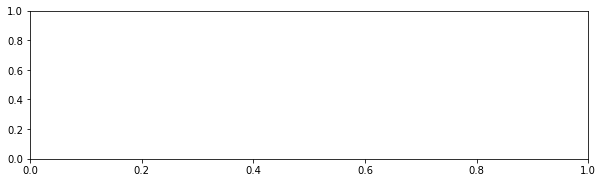

In [4]:
data = pd.DataFrame(train_df.iloc[:,6:])

plt.figure(figsize=(10, 6))

# Feature1의 히스토그램
plt.subplot(2, 1, 1)
sns.histplot(data['X_1'], bins=range(int(min(data['X_1'])), int(max(data['X_1'])) + 1), kde=False)
plt.title('Histogram of X_1')

# Feature2의 히스토그램
plt.subplot(2, 1, 2)
sns.histplot(data['X_2'], bins=range(int(min(data['X_2'])), int(max(data['X_2'])) + 1), kde=False)
plt.title('Histogram of X_2')

plt.tight_layout()
plt.show()

In [18]:
#히스토그램을 위해 
data = pd.DataFrame(train_df.iloc[:,6:])
data

X_1   X_2  X_3   X_4   X_5  X_6   X_7   X_8   X_9  X_10  ...  X_2866  \
0     NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...   39.34   
1     NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...   38.89   
2     NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...   39.19   
3     NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...   37.74   
4     NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...   38.70   
..    ...   ...  ...   ...   ...  ...   ...   ...   ...   ...  ...     ...   
593   2.0  95.0  0.0  45.0  10.0  0.0  50.0  10.0  52.0   2.0  ...     NaN   
594   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...   49.47   
595   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...     NaN   
596  40.0  94.0  0.0  45.0  11.0  0.0  45.0  10.0  31.0   2.0  ...     NaN   
597  21.0  87.0  0.0  45.0  10.0  0.0  61.0  10.0  52.0   2.0  ...     NaN   

     X_2867  X_2868  X_2869  X_2870  X_2871  X_2872  X_2873  X_2874  X_2875  
0     40.89   32.56   34.09   77.77     NaN     NaN     NaN     NaN     NaN  
1     42.82   43.92   35.34   72.55     NaN     NaN     NaN     NaN     NaN  
2     36.65   42.47   36.53   78.35     NaN     NaN     NaN     NaN     NaN  
3     39.17   52.17   30.58   71.78     NaN     NaN     NaN     NaN     NaN  
4     41.89   46.93   33.09   76.97     NaN     NaN     NaN     NaN     NaN  
..      ...     ...     ...     ...     ...     ...     ...     ...     ...  
593     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
594   53.07   50.89   55.10   66.49     1.0     NaN     NaN     NaN     NaN  
595     NaN     NaN     NaN     NaN     1.0     NaN     NaN     NaN     NaN  
596     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
597     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[598 rows x 2875 columns]

In [78]:
train_df[train_df['Y_Class']==2]

PRODUCT_ID  Y_Class  Y_Quality         TIMESTAMP     LINE PRODUCT_CODE  \
1    TRAIN_001        2   0.541819   2022-06-13 5:22  T050307         A_31   
3    TRAIN_003        2   0.537325   2022-06-13 5:39  T050307         A_31   
5    TRAIN_005        2   0.537833   2022-06-13 5:55  T050307         A_31   
7    TRAIN_007        2   0.540003   2022-06-13 6:11  T050307         A_31   
9    TRAIN_009        2   0.538049   2022-06-13 6:28  T050307         A_31   
..         ...      ...        ...               ...      ...          ...   
563  TRAIN_563        2   0.537465   2022-09-03 1:22  T050304         A_31   
564  TRAIN_564        2   0.540106   2022-09-03 1:30  T050304         A_31   
570  TRAIN_570        2   0.534951  2022-09-03 18:40  T100306         O_31   
572  TRAIN_572        2   0.535205  2022-09-03 18:56  T100306         O_31   
578  TRAIN_578        2   0.535905   2022-09-04 0:57  T100306         T_31   

     X_1   X_2  X_3   X_4  ...  X_2866  X_2867  X_2868  X_2869  X_2870  \
1    NaN   NaN  NaN   NaN  ...   38.89   42.82   43.92   35.34   72.55   
3    NaN   NaN  NaN   NaN  ...   37.74   39.17   52.17   30.58   71.78   
5    NaN   NaN  NaN   NaN  ...   38.16   51.25   56.01   37.41   71.37   
7    NaN   NaN  NaN   NaN  ...   39.00   35.95   59.51   30.49   72.77   
9    NaN   NaN  NaN   NaN  ...   34.40   35.88   50.36   38.45   71.42   
..   ...   ...  ...   ...  ...     ...     ...     ...     ...     ...   
563  NaN   NaN  NaN   NaN  ...   49.92   54.66   50.56   48.63   62.17   
564  NaN   NaN  NaN   NaN  ...   57.94   55.84   53.24   56.72   64.17   
570  6.0  90.0  0.0  45.0  ...     NaN     NaN     NaN     NaN     NaN   
572  6.0  89.0  0.0  45.0  ...     NaN     NaN     NaN     NaN     NaN   
578  2.0  91.0  0.0  45.0  ...     NaN     NaN     NaN     NaN     NaN   

     X_2871  X_2872  X_2873  X_2874  X_2875  
1       NaN     NaN     NaN     NaN     NaN  
3       NaN     NaN     NaN     NaN     NaN  
5       NaN     NaN     NaN     NaN     NaN  
7       NaN     NaN     NaN     NaN     NaN  
9       NaN     NaN     NaN     NaN     NaN  
..      ...     ...     ...     ...     ...  
563     1.0     NaN     NaN     NaN     NaN  
564     1.0     NaN     NaN     NaN     NaN  
570     NaN     NaN     NaN     NaN     NaN  
572     NaN     NaN     NaN     NaN     NaN  
578     NaN     NaN     NaN     NaN     NaN  

[103 rows x 2881 columns]

In [70]:
test_df = pd.read_csv('./test.csv')
test_df

PRODUCT_ID         TIMESTAMP     LINE PRODUCT_CODE  X_1   X_2  X_3   X_4  \
0     TEST_000   2022-09-09 2:01  T100306         T_31  2.0  94.0  0.0  45.0   
1     TEST_001   2022-09-09 2:09  T100304         T_31  2.0  93.0  0.0  45.0   
2     TEST_002   2022-09-09 8:42  T100304         T_31  2.0  95.0  0.0  45.0   
3     TEST_003  2022-09-09 10:56  T010305         A_31  NaN   NaN  NaN   NaN   
4     TEST_004  2022-09-09 11:04  T010306         A_31  NaN   NaN  NaN   NaN   
..         ...               ...      ...          ...  ...   ...  ...   ...   
305   TEST_305  2022-11-05 11:18  T100306         T_31  2.0  91.0  0.0  45.0   
306   TEST_306  2022-11-05 16:39  T100304         T_31  2.0  96.0  0.0  45.0   
307   TEST_307  2022-11-05 16:47  T100306         T_31  2.0  91.0  0.0  45.0   
308   TEST_308  2022-11-05 20:53  T100306         T_31  2.0  95.0  0.0  45.0   
309   TEST_309  2022-11-05 21:01  T100306         T_31  2.0  87.0  0.0  45.0   

      X_5  X_6  ...  X_2866  X_2867  X_2868  X_2869  X_2870  X_2871  X_2872  \
0    10.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1    11.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2    11.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3     NaN  NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4     NaN  NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
..    ...  ...  ...     ...     ...     ...     ...     ...     ...     ...   
305  10.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
306  11.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
307  10.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
308  10.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
309  10.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

     X_2873  X_2874  X_2875  
0       NaN     NaN     NaN  
1       NaN     NaN     NaN  
2       NaN     NaN     NaN  
3       NaN     NaN     NaN  
4       NaN     NaN     NaN  
..      ...     ...     ...  
305     NaN     NaN     NaN  
306     NaN     NaN     NaN  
307     NaN     NaN     NaN  
308     NaN     NaN     NaN  
309     NaN     NaN     NaN  

[310 rows x 2879 columns]

In [13]:
# test 데이터에는 Y_Class와 Y_Quality가 빠져 있는 것으로 보아
# 우리는 빠진 두 가지를 예측 해야함을 알 수 있다.

In [14]:
#submission이라는 객체에 submission.csv 파일을 할당한다.
submission = pd.read_csv('./sample_submission.csv')
submission

PRODUCT_ID  Y_Class
0     TEST_000        0
1     TEST_001        0
2     TEST_002        0
3     TEST_003        0
4     TEST_004        0
..         ...      ...
305   TEST_305        0
306   TEST_306        0
307   TEST_307        0
308   TEST_308        0
309   TEST_309        0

[310 rows x 2 columns]

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Columns: 2881 entries, PRODUCT_ID to X_2875
dtypes: float64(2876), int64(1), object(4)
memory usage: 13.1+ MB


In [6]:
#LINE 별로 제품 공정할 때 문제가 발생할 수 있으므로.
#Y_Quality의 평균을 구해본다.
train_df.groupby("LINE")["Y_Quality"].mean()

LINE
T010305    0.530675
T010306    0.534307
T050304    0.527951
T050307    0.535738
T100304    0.529918
T100306    0.530735
Name: Y_Quality, dtype: float64

In [7]:
train_df.groupby("Y_Class")["Y_Quality"].mean()

Y_Class
0    0.520837
1    0.530253
2    0.542031
Name: Y_Quality, dtype: float64

plot 함수를 사용하면 전체 데이터의 graph를 그림

<AxesSubplot:>

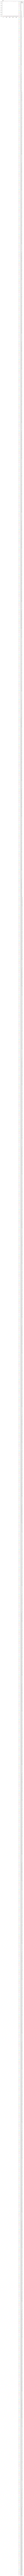

In [8]:
train_df.plot()

In [ ]:
set(test['now_station'].unique()) - set(train['now_station'].unique())

In [ ]:
def boxplot_vis(data):
    plt.figure(figsize=(30, 30))
    for col_idx in range(len(data.columns[:])):
        # 6행 2열 서브플롯에 각 feature 박스플롯 시각화
        plt.subplot(6, 2, col_idx+1)
        # flierprops: 빨간색 다이아몬드 모양으로 아웃라이어 시각화
        plt.boxplot(data[data.columns[col_idx]], flierprops = dict(markerfacecolor = 'r', marker = 'D'))
        # 그래프 타이틀: feature name
        plt.title("Feature" + "(" + target_name + "):" + data.columns[col_idx], fontsize = 20)
    plt.savefig('../figure/boxplot_' + target_name + '.png')
    plt.show()

In [21]:
[x for x in train_df.iloc[:,6:12].columns]

['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6']

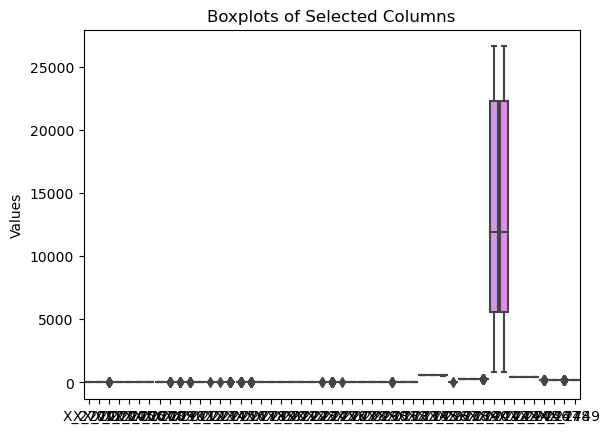

In [39]:
selected_columns = [x for x in train_df.iloc[:,2706:2755].columns]
selected_data = train_df[selected_columns]

# Boxplot 그리기
fig, ax = plt.subplots()

# seaborn의 boxplot 활용
sns.boxplot(data=selected_data, ax=ax)

# 라벨 및 제목 추가
ax.set_ylabel('Values')
ax.set_title('Boxplots of Selected Columns')

plt.show()

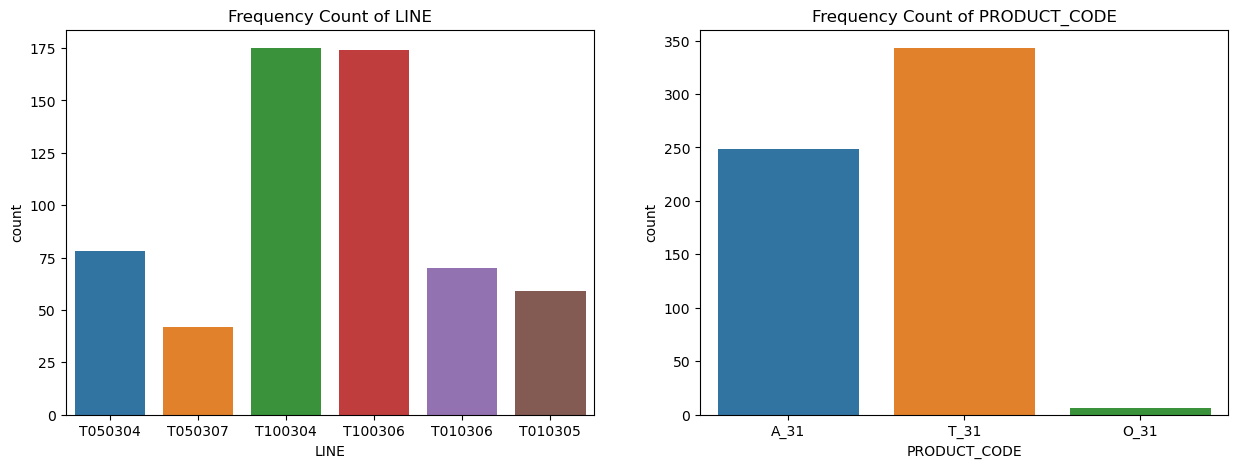

In [43]:
#여러 범주형 변수의 boxplot을 이용한 빈도수 분포 체크
df = pd.DataFrame(train_df[['LINE', 'PRODUCT_CODE']])

# 여러 개의 빈도수 막대 그래프 그리기
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(15, 5))

for i, column in enumerate(df.columns):
    sns.countplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(f'Frequency Count of {column}')

plt.show()

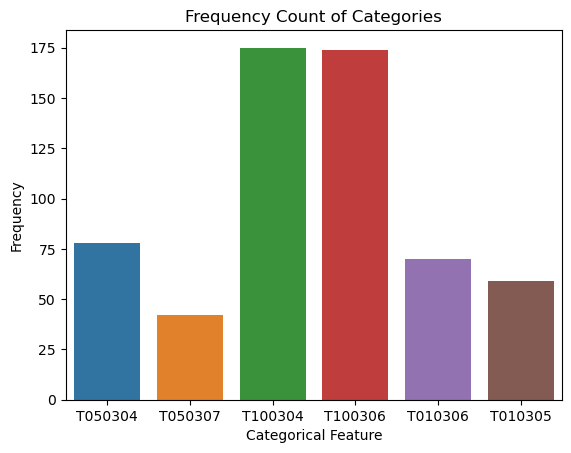

In [45]:
#범주형 변수의 boxplot을 이용한 빈도수 분포 체크
line = pd.DataFrame(train_df['LINE'])

# 범주형 변수의 빈도수 막대 그래프 그리기
sns.countplot(x='LINE', data=line)

# 그래프에 라벨 추가
plt.xlabel('Categorical Feature')
plt.ylabel('Frequency')
plt.title('Frequency Count of Categories')

plt.show()

In [13]:
#결측치가 있어서 분석이 어려움
import seaborn as sns
import matplotlib.pyplot as plt

# 산점도 행렬 그리기
sns.pairplot(train_t)
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x162384a60> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x16be09040> (for post_execute):


KeyboardInterrupt: 

In [ ]:
#결측치가 있어서 분석이 어려움
#t value가 클수록 독립변수와 종속변수 간에 선형관계(관련성)이 존재.
#회귀계수 (R-squared)가 80퍼 이상이면, 1에 가까울수록 회귀선이 데이터를 적절하게 설명.
#유의수준 5% 하에서 F-통계량의 p-value값이 0.05보다 작으면 추정된 회귀식은 통계적으로 유의하다고 봄

In [43]:
train_t = train_df[train_df['PRODUCT_CODE']=='T_31']
train_t = train_t.iloc[:,:85]

# 독립 변수와 종속 변수 설정 / 결측치가 없는 T제품 구간으로 Feature 1,2,3,4만 진행
X = train_t[[x for x in train_t.columns[81:85]]]
y = train_t['Y_Class']
train_t

PRODUCT_ID  Y_Class  Y_Quality         TIMESTAMP     LINE PRODUCT_CODE  \
22   TRAIN_022        0   0.517719   2022-06-14 8:53  T100304         T_31   
23   TRAIN_023        0   0.519090   2022-06-14 9:01  T100304         T_31   
25   TRAIN_025        1   0.529362   2022-06-19 9:11  T100304         T_31   
26   TRAIN_026        1   0.531992   2022-06-19 9:20  T100306         T_31   
29   TRAIN_029        1   0.532405  2022-06-19 23:31  T100304         T_31   
..         ...      ...        ...               ...      ...          ...   
589  TRAIN_589        1   0.529510  2022-09-06 18:00  T100306         T_31   
590  TRAIN_590        1   0.529948   2022-09-07 1:01  T100306         T_31   
591  TRAIN_591        1   0.529308   2022-09-07 1:09  T100306         T_31   
592  TRAIN_592        1   0.528349  2022-09-08 14:22  T100304         T_31   
593  TRAIN_593        1   0.526546  2022-09-08 14:30  T100306         T_31   

     X_1    X_2  X_3   X_4  ...  X_70  X_71  X_72   X_73  X_74  X_75  X_76  \
22   2.0  102.0  0.0  45.0  ...   0.0   2.0   2.0   9.62   0.0   0.0   0.0   
23   2.0  102.0  0.0  45.0  ...   0.0   2.0   2.0   9.62   0.0   0.0   0.0   
25   2.0   97.0  0.0  45.0  ...   0.0   2.0   2.0   9.73   0.0   0.0   0.0   
26   2.0   95.0  0.0  45.0  ...   0.0   2.0   2.0  10.09   0.0   0.0   0.0   
29   2.0  100.0  0.0  45.0  ...   0.0   2.0   2.0   9.82   0.0   0.0   0.0   
..   ...    ...  ...   ...  ...   ...   ...   ...    ...   ...   ...   ...   
589  1.0   94.0  0.0  45.0  ...   0.0   2.0   2.0  10.09   0.0   0.0   0.0   
590  1.0   89.0  0.0  45.0  ...   0.0   2.0   2.0  10.09   0.0   0.0   0.0   
591  1.0   87.0  0.0  45.0  ...   0.0   2.0   2.0  10.09   0.0   0.0   0.0   
592  2.0   98.0  0.0  45.0  ...   0.0   2.0   2.0  10.19   0.0   0.0   0.0   
593  2.0   95.0  0.0  45.0  ...   0.0   2.0   2.0  10.09   0.0   0.0   0.0   

     X_77  X_78  X_79  
22    0.0   0.0   0.0  
23    0.0   0.0   0.0  
25    0.0   0.0   0.0  
26    0.0   0.0   0.0  
29    0.0   0.0   0.0  
..    ...   ...   ...  
589   0.0   0.0   0.0  
590   0.0   0.0   0.0  
591   0.0   0.0   0.0  
592   0.0   0.0   0.0  
593   0.0   0.0   0.0  

[343 rows x 85 columns]

In [68]:
#다변량 회귀
import statsmodels.api as sm

train_tt = train_df[train_df['PRODUCT_CODE']=='T_31']
#train_t = train_t.iloc[:,:]

# 독립 변수와 종속 변수 설정 / 결측치가 없는 T제품 구간으로 Feature 1,2,3,4만 진행
X = train_tt[[x for x in train_tt.columns[6:80]]]
y = train_tt['Y_Class']

# 다변량 회귀 모델 피팅
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Y_Class   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     6.601
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.21e-22
Time:                        14:05:43   Log-Likelihood:                -78.679
No. Observations:                 343   AIC:                             235.4
Df Residuals:                     304   BIC:                             385.0
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X_1            0.0004      0.003      0.132      0.8

In [59]:
train_tt = train_df[train_df['PRODUCT_CODE']=='T_31']
train_tt.iloc[:,6:80].isnull().sum().describe()

count    74.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
dtype: float64

train_df에서 상관도가 높은 독립변수들로 feature selection을 진행.

In [89]:
train_a = train_df[train_df['PRODUCT_CODE']=='A_31']
train_t = train_df[train_df['PRODUCT_CODE']=='T_31']
train_o = train_df[train_df['PRODUCT_CODE']=='O_31']
train_to = train_df[(train_df['PRODUCT_CODE']=='O_31') | (train_df['PRODUCT_CODE']=='T_31')]

In [95]:
delete_a = train_a.isnull().sum()[train_a.isnull().sum() == len(train_a)].index.tolist()
train_a = train_a.drop(columns = delete_a, axis = 1)

In [96]:
len(delete_a)

759

In [97]:
delete_t = train_t.isnull().sum()[train_t.isnull().sum() == len(train_t)].index.tolist()
train_t = train_t.drop(columns = delete_t, axis = 1)

In [98]:
len(delete_t)

2198

In [99]:
delete_o = train_o.isnull().sum()[train_o.isnull().sum() == len(train_o)].index.tolist()
train_o = train_o.drop(columns = delete_o, axis = 1)

In [100]:
len(delete_o)

2208

In [102]:
delete_to = train_to.isnull().sum()[train_to.isnull().sum() == len(train_to)].index.tolist()
train_to = train_to.drop(columns = delete_to, axis = 1)

In [103]:
len(delete_to)

2198

### a제품과 to 제품은 사용컬럼이 6개만 겹친다.

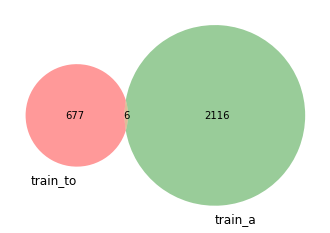

In [105]:
#to제품 결합 후, null컬럼제거, 사용컬럼 비율을 벤다이어그램으로 a제품과 비교
def venn(sets):
    venn2(subsets=sets, set_labels=('train_to', 'train_a'))
    plt.show()
    
s1 = set(train_to)
s2 = set(train_a)

venn([s1, s2])

### t제품과 o제품은 사용컬럼이 거의 비슷 673개 겹친다. 

### t가 10개의 컬럼 더 사용.

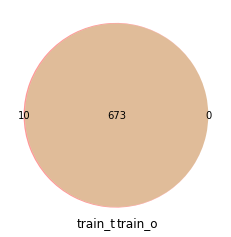

In [106]:
#사용컬럼 비율을 벤다이어그램으로 t제품과 o제품 비교
def venn(sets):
    venn2(subsets=sets, set_labels=('train_t', 'train_o'))
    plt.show()
    
s1 = set(train_t)
s2 = set(train_o)

venn([s1, s2])

In [107]:
test_df[test_df['PRODUCT_CODE']=='T_31']

PRODUCT_ID         TIMESTAMP     LINE PRODUCT_CODE  X_1    X_2  X_3   X_4  \
0     TEST_000   2022-09-09 2:01  T100306         T_31  2.0   94.0  0.0  45.0   
1     TEST_001   2022-09-09 2:09  T100304         T_31  2.0   93.0  0.0  45.0   
2     TEST_002   2022-09-09 8:42  T100304         T_31  2.0   95.0  0.0  45.0   
15    TEST_015   2022-09-20 5:20  T100304         T_31  2.0  102.0  0.0  45.0   
16    TEST_016   2022-09-20 5:28  T100306         T_31  2.0   93.0  0.0  45.0   
..         ...               ...      ...          ...  ...    ...  ...   ...   
305   TEST_305  2022-11-05 11:18  T100306         T_31  2.0   91.0  0.0  45.0   
306   TEST_306  2022-11-05 16:39  T100304         T_31  2.0   96.0  0.0  45.0   
307   TEST_307  2022-11-05 16:47  T100306         T_31  2.0   91.0  0.0  45.0   
308   TEST_308  2022-11-05 20:53  T100306         T_31  2.0   95.0  0.0  45.0   
309   TEST_309  2022-11-05 21:01  T100306         T_31  2.0   87.0  0.0  45.0   

      X_5  X_6  ...  X_2866  X_2867  X_2868  X_2869  X_2870  X_2871  X_2872  \
0    10.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1    11.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2    11.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
15   11.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
16   10.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
..    ...  ...  ...     ...     ...     ...     ...     ...     ...     ...   
305  10.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
306  11.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
307  10.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
308  10.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
309  10.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

     X_2873  X_2874  X_2875  
0       NaN     NaN     NaN  
1       NaN     NaN     NaN  
2       NaN     NaN     NaN  
15      NaN     NaN     NaN  
16      NaN     NaN     NaN  
..      ...     ...     ...  
305     NaN     NaN     NaN  
306     NaN     NaN     NaN  
307     NaN     NaN     NaN  
308     NaN     NaN     NaN  
309     NaN     NaN     NaN  

[239 rows x 2879 columns]

In [108]:
len(test_df)

310

t제품이 test data의 큰 비중을 차지함. -> to제품을 묶어서 학습시키는 것이 좋을듯하다.

o제품의 수가 너무 적기도 하고, to 제품이 사용하는 컬럼이 상당히 유사.

t제품을 공략하는 것도 예측률을 높이는 하나의 방법이 될 수 있음.(사용하는 컬럼 수도 a제품에 비해 적다.)